# Market Impact

In [1]:
%matplotlib notebook

In [2]:
import environment
import utility
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [4]:
tmin=9.5*1e9*60*60  # 9:30
tmax=16.5*1e9*60*60 # 16:30
symbols_liquid = ['AAPL', 'INTC', 'MSFT', 'SPY']
symbols_illiquid = ['ABBV','WRB-C', 'BPOPN','GDXJ', 'ALPN', 'EOS', 'VFMF', 'PIN', 'EWGS', 'WNS']

symbols = symbols_liquid + symbols_illiquid

dates = ['01302019','03272019','05302018']
LOCATION = '/Volumes/LaCie/'

# Functions

In [5]:
def avg_price(q,book_slice):
    
    total_liquidity = np.inf
    
    if q>0:
        if q > book_slice['1_ask_vol']:
            prices = book_slice.iloc[3::4]
            vols = book_slice.iloc[4::4]
            total_liquidity = book_slice.iloc[4::4].sum()
                
            remaining_size = (q-vols.cumsum())[(q-vols.cumsum())>0].iloc[-1]
            remaining_price = prices[((q-vols.cumsum())>0).values].iloc[-1]

            avg_price = (((vols.multiply(prices.values))[vols.cumsum()<=q]).sum()+remaining_size*remaining_price)/q

        else:
            avg_price = book_slice['1_ask_price']
            
    elif q<0:
        q = -q
        if q > book_slice['1_bid_vol']:
            vols = book_slice.iloc[2::4]
            prices = book_slice.iloc[1::4]
            total_liquidity = book_slice.iloc[4::4].sum()
            
            remaining_size = (q-vols.cumsum())[(q-vols.cumsum())>0].iloc[-1]
            remaining_price = prices[((q-vols.cumsum())>0).values].iloc[-1]
            
            avg_price = (vols.multiply(prices.values)[vols.cumsum()<=q].sum()+remaining_size*remaining_price)/q       
        else:
            avg_price = book_slice['1_bid_price']
    
    else:
        avg_price = (book_slice['1_bid_price']+book_slice['1_ask_price'])/2
 
    if q>total_liquidity:
        return np.nan
    else:
        return avg_price
    
def mkt_impact(ticker, date='01302019', plot=True):
    Q = np.linspace(-100000,100000,200)
    T = np.linspace(0.3,0.7,11)
    P = np.zeros((len(T),len(Q)))
    a = environment.ts(date,'NASDAQ',ticker,PATH=LOCATION,levels=20)
    
    for i,t in enumerate(T):
        book_slice = a.book.iloc[int(len(a.time)*t)]

        mid = (book_slice['1_bid_price']+book_slice['1_ask_price'])/2

        for j,q in enumerate(Q):
            P[i,j] = (np.abs(avg_price(q,book_slice)-mid)/mid*1e4)

    df = pd.DataFrame(P, index = T, columns = Q)

    try:
        if plot:
            m = df.dropna(axis=1, how='any').mean()
            s = df.dropna(axis=1, how='any').std()/np.sqrt(len(T))
            plt.figure()
            ax = m.plot()
            ax.fill_between(m.index, m - s, m + s,alpha=.25)
            #plt.tight_layout()
            plt.ylabel("mkt impact bps")
            plt.xlabel("size (shares)")
            plt.title(a.stock + ' ('+ str(int(mid))+'$) ' + date)
            #sns.despine()
            plt.show()
    except:
        pa
    
    return df

# Results

For some securites the market impact is defined as 
$$I_t(q) = \frac{\overline p_t(q)-M_t}{M_t}$$
where $p_t(q)$ si the average price aid when sending a merket order to the exhange of $q$ shares, and $M_t$ is the mid price at time $t$. 
$p_t$ is computed using order book data at time $t$. 
For each security is recorder $I_t(q)$ for different times troughtout the day and in the picures is highlighted the mean $\pm \sigma$ 

<IPython.core.display.Javascript object>


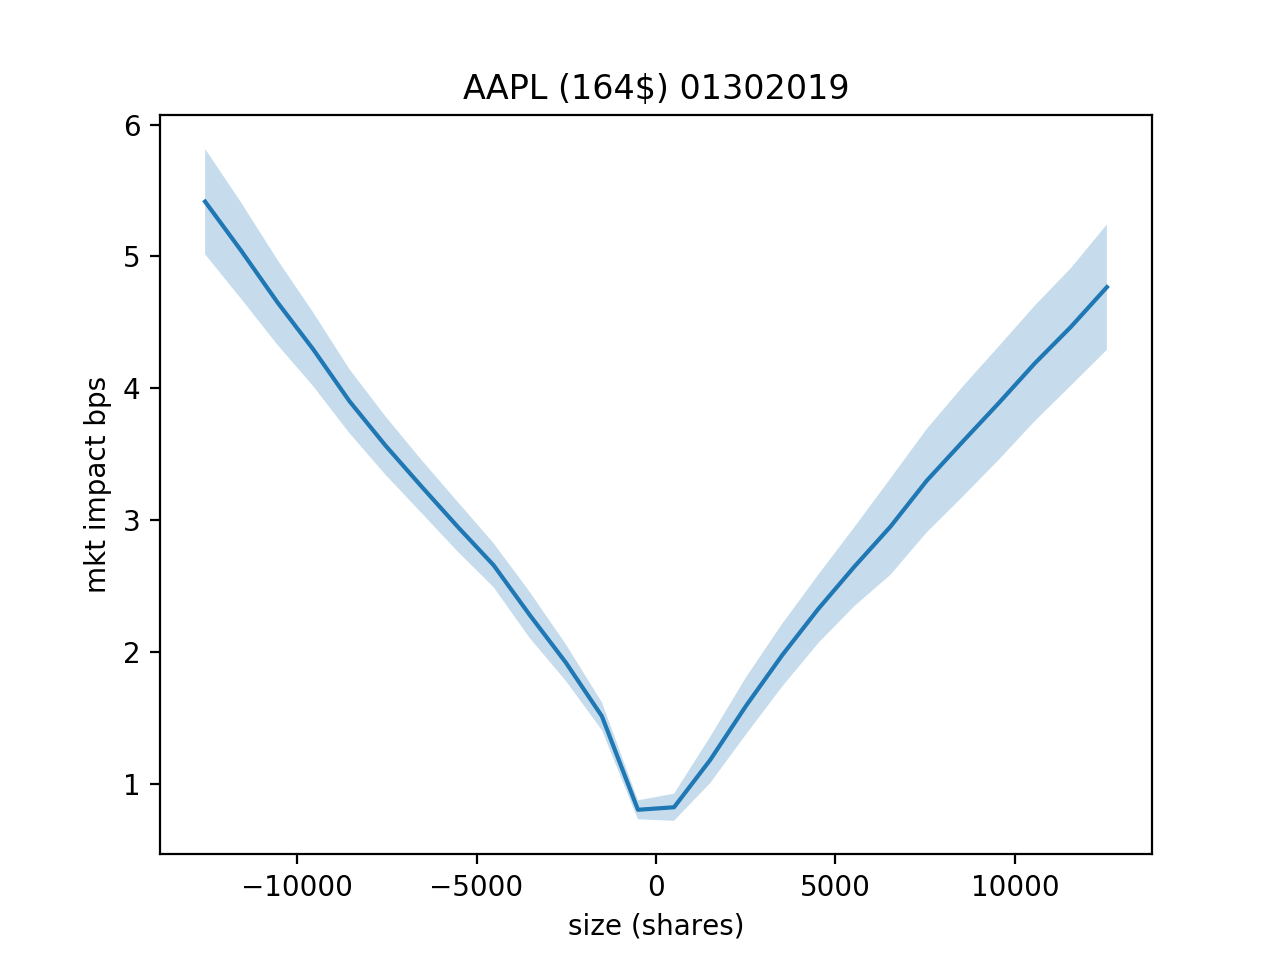

<IPython.core.display.Javascript object>


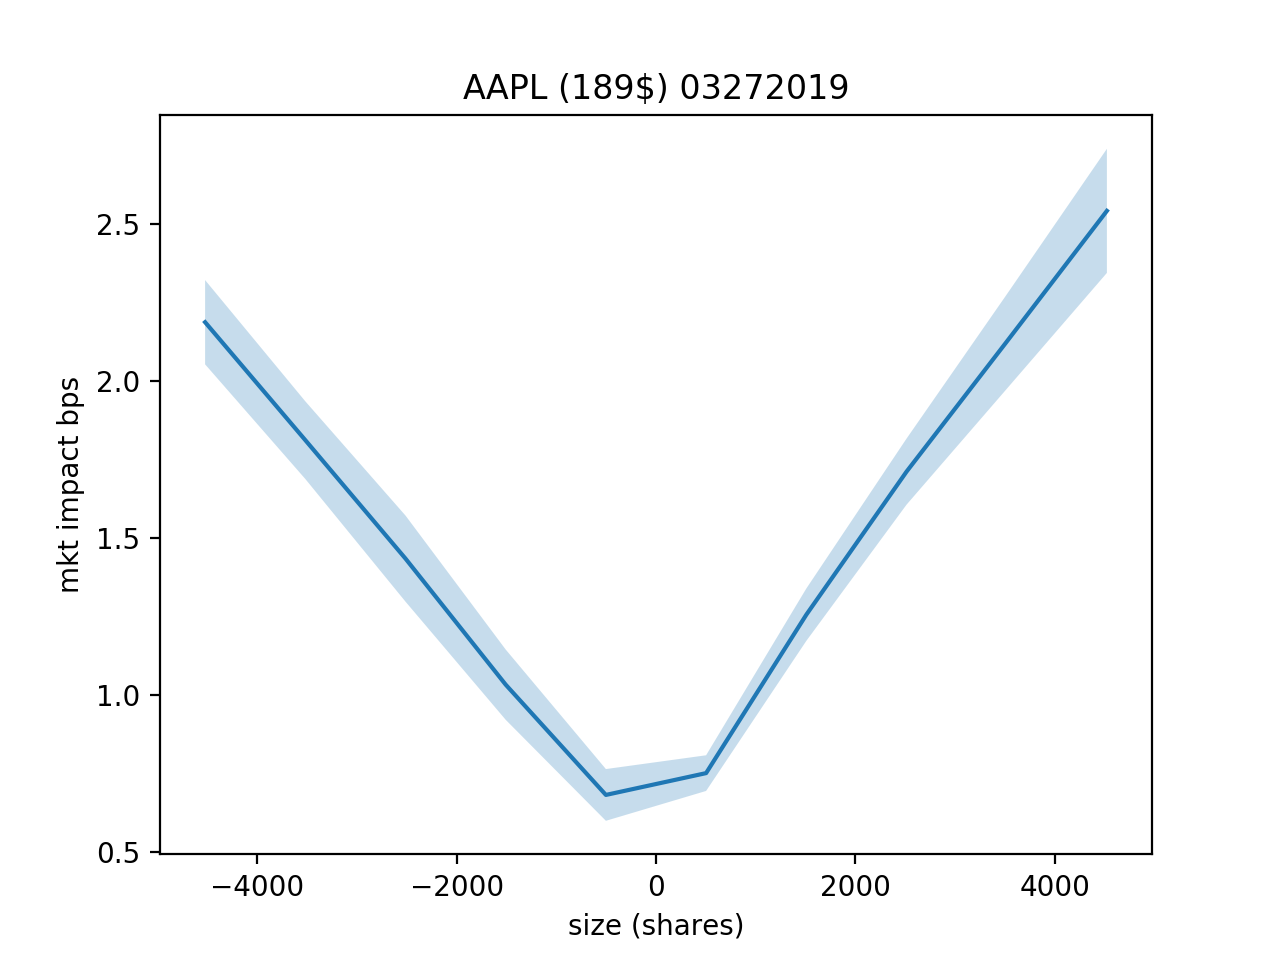

<IPython.core.display.Javascript object>


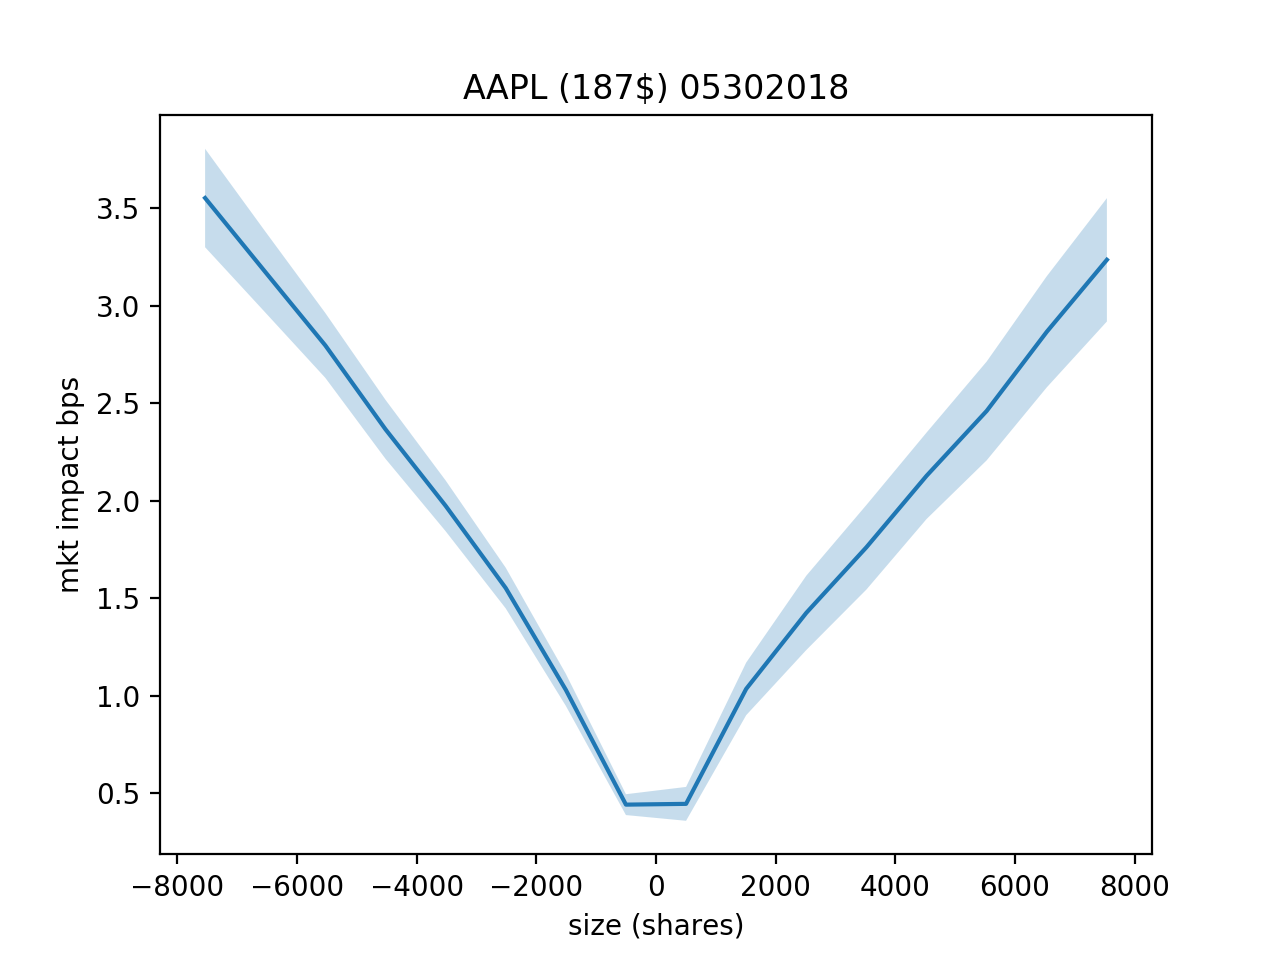

<IPython.core.display.Javascript object>


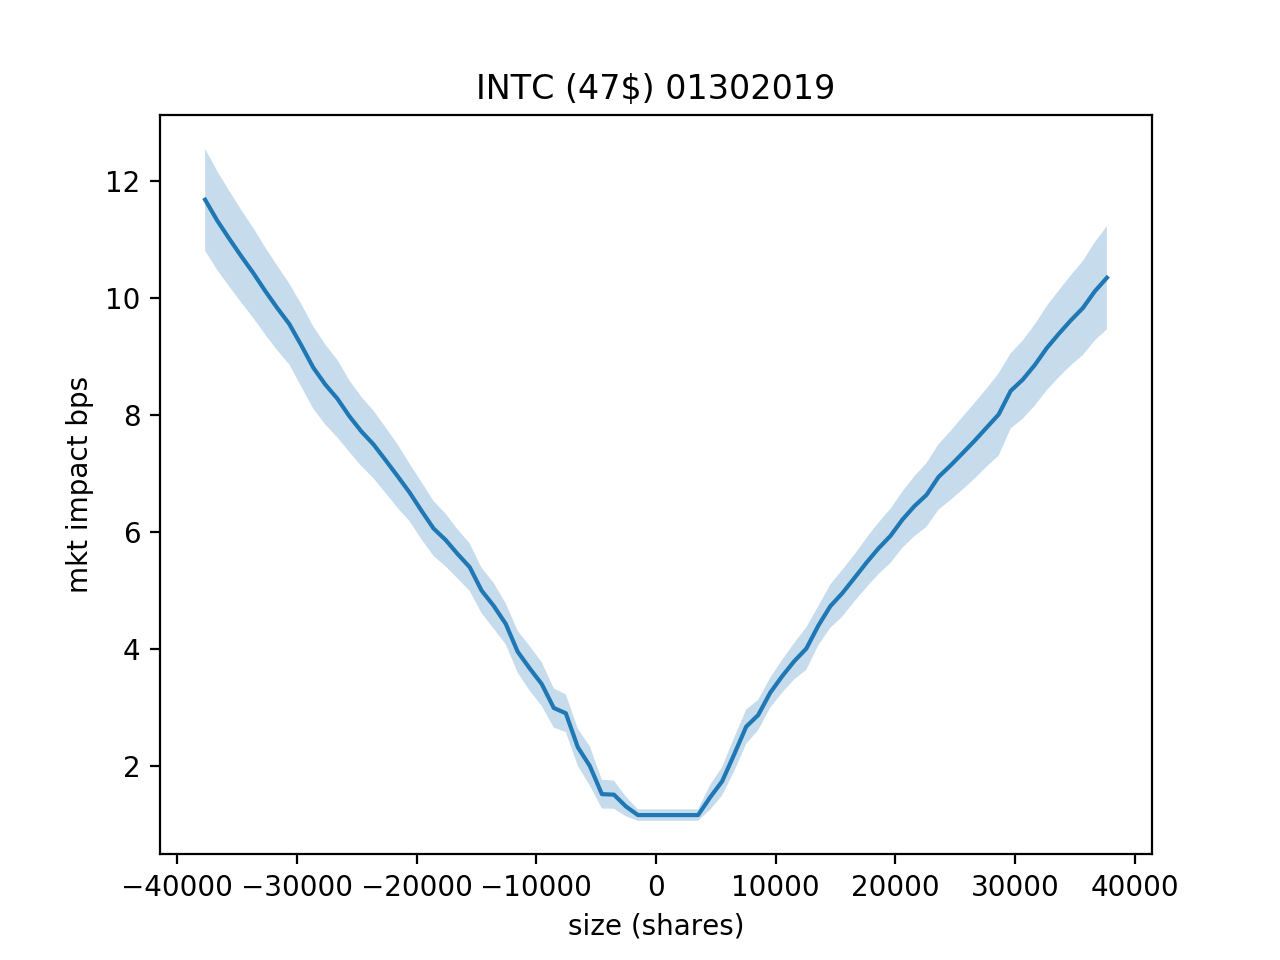

<IPython.core.display.Javascript object>


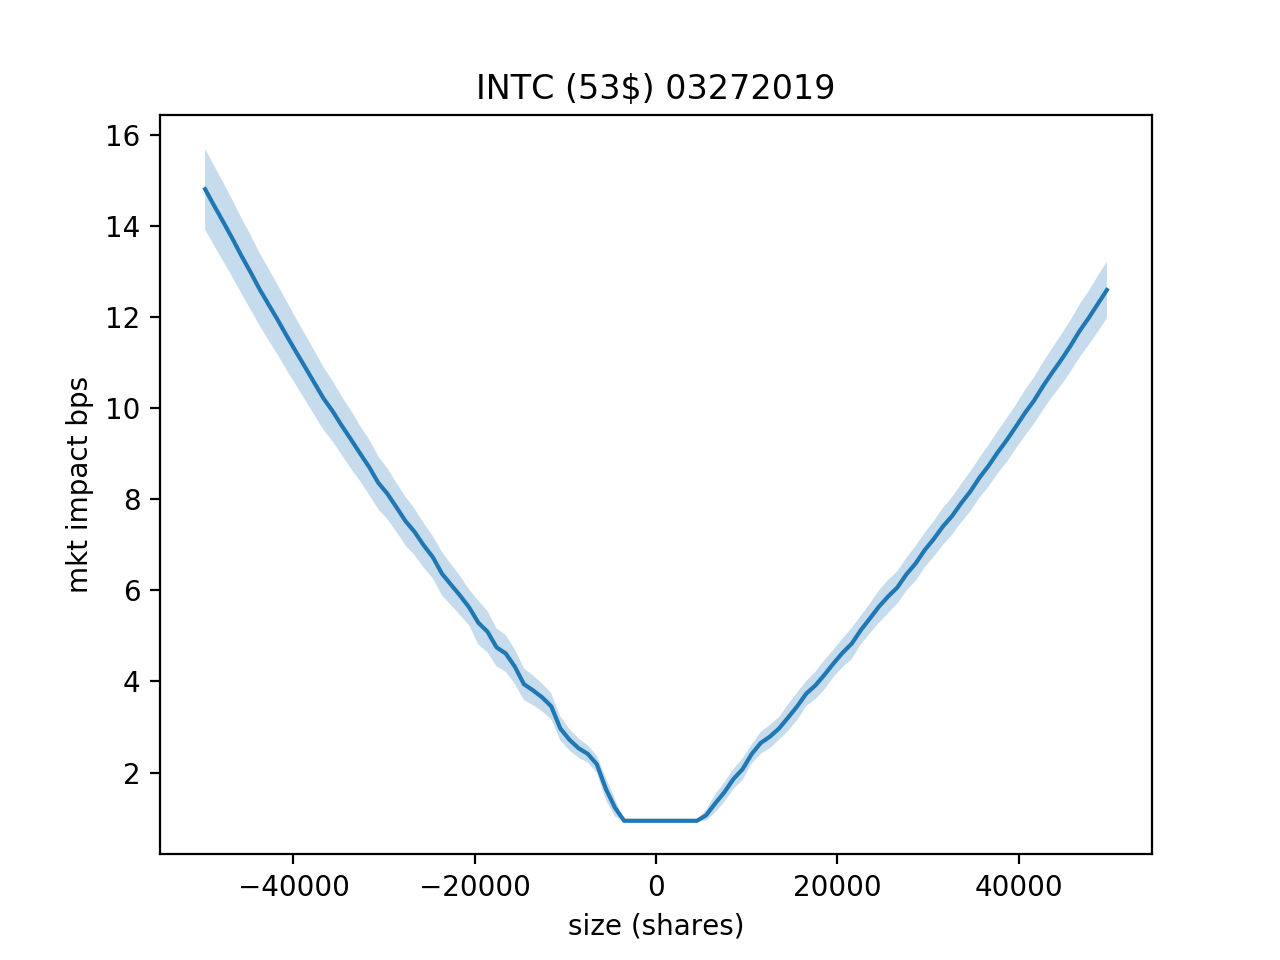

<IPython.core.display.Javascript object>


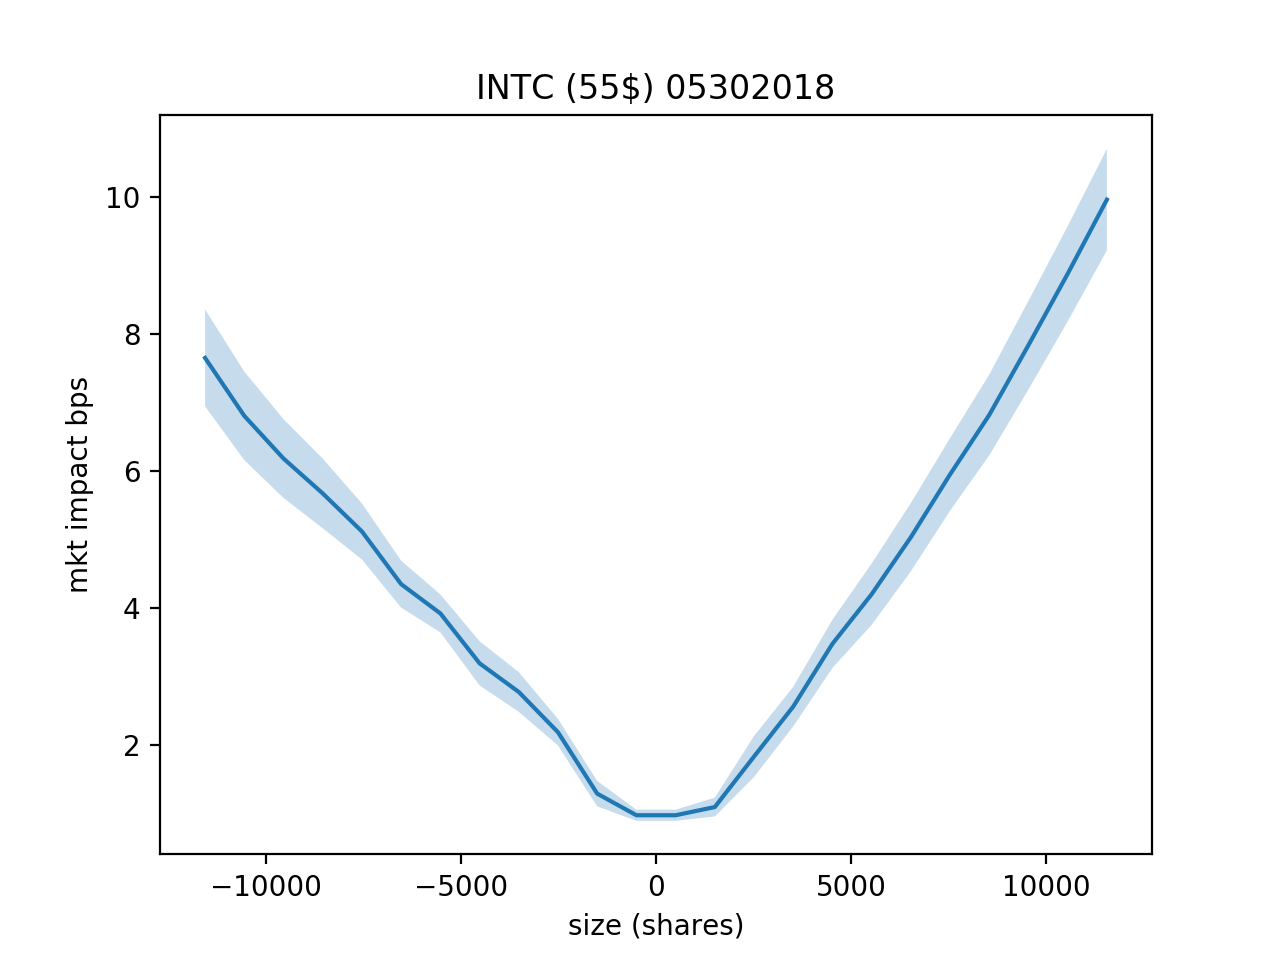

<IPython.core.display.Javascript object>


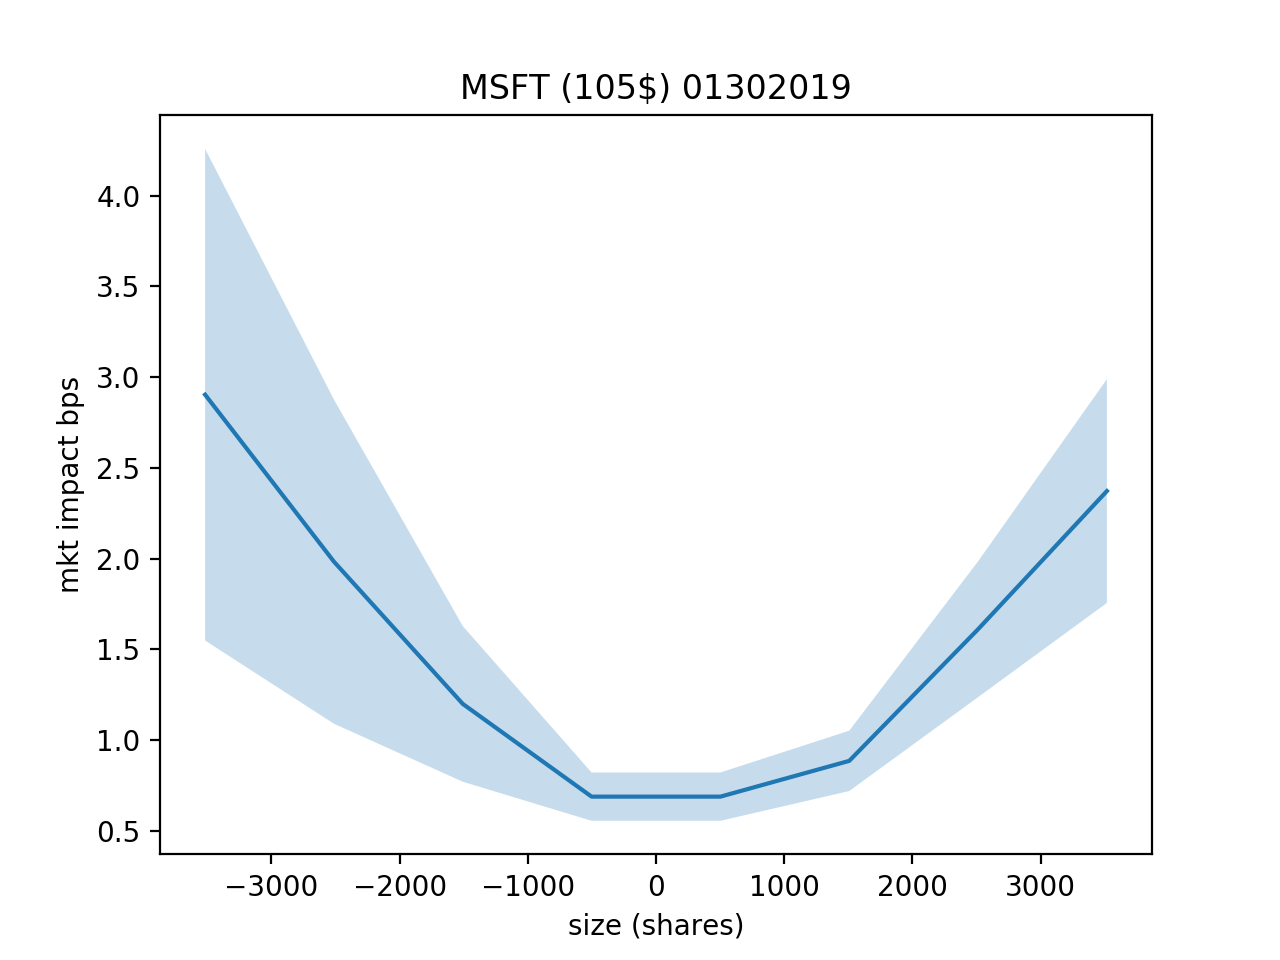

<IPython.core.display.Javascript object>


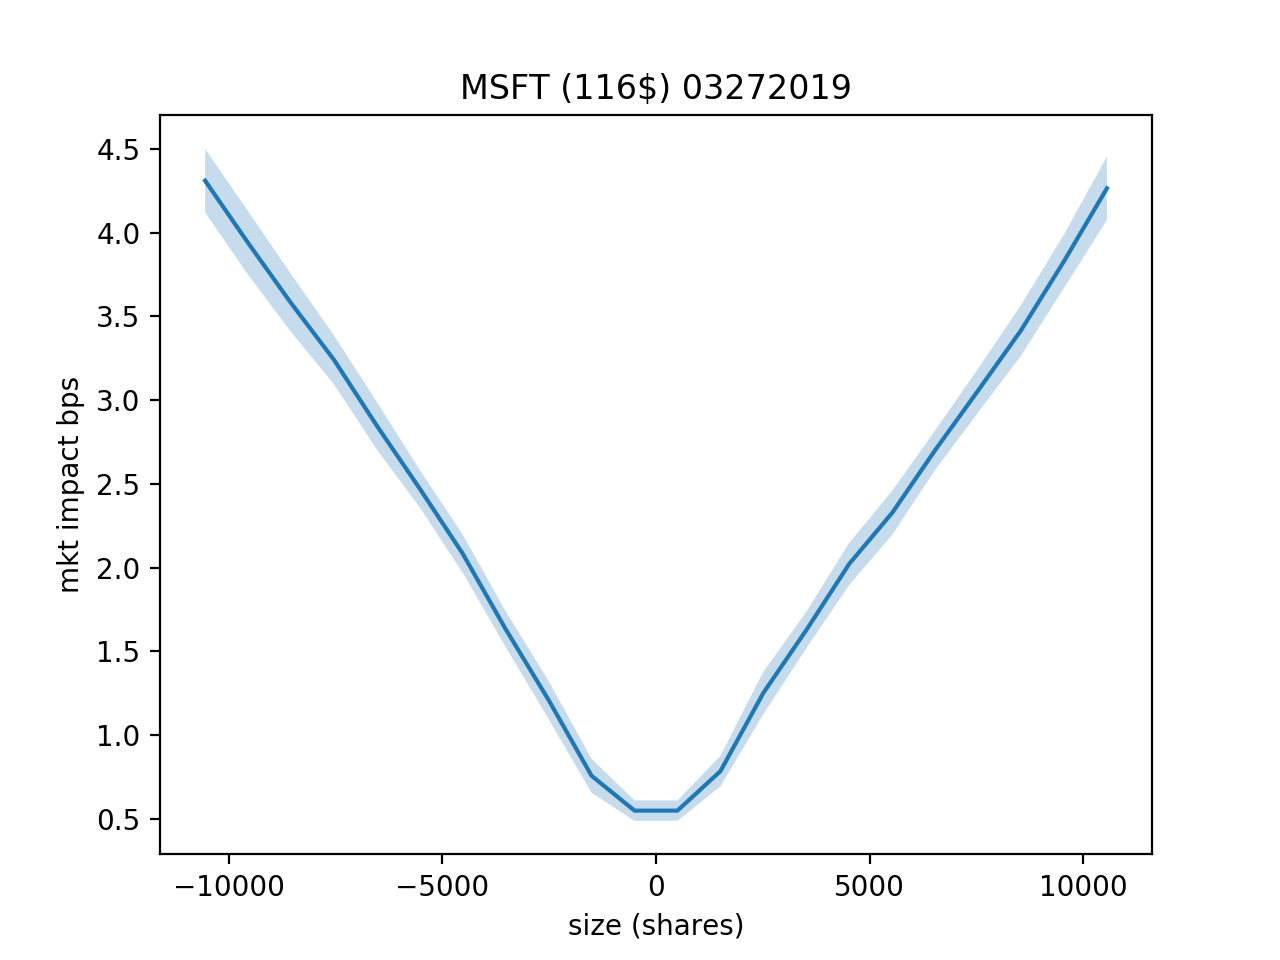

<IPython.core.display.Javascript object>


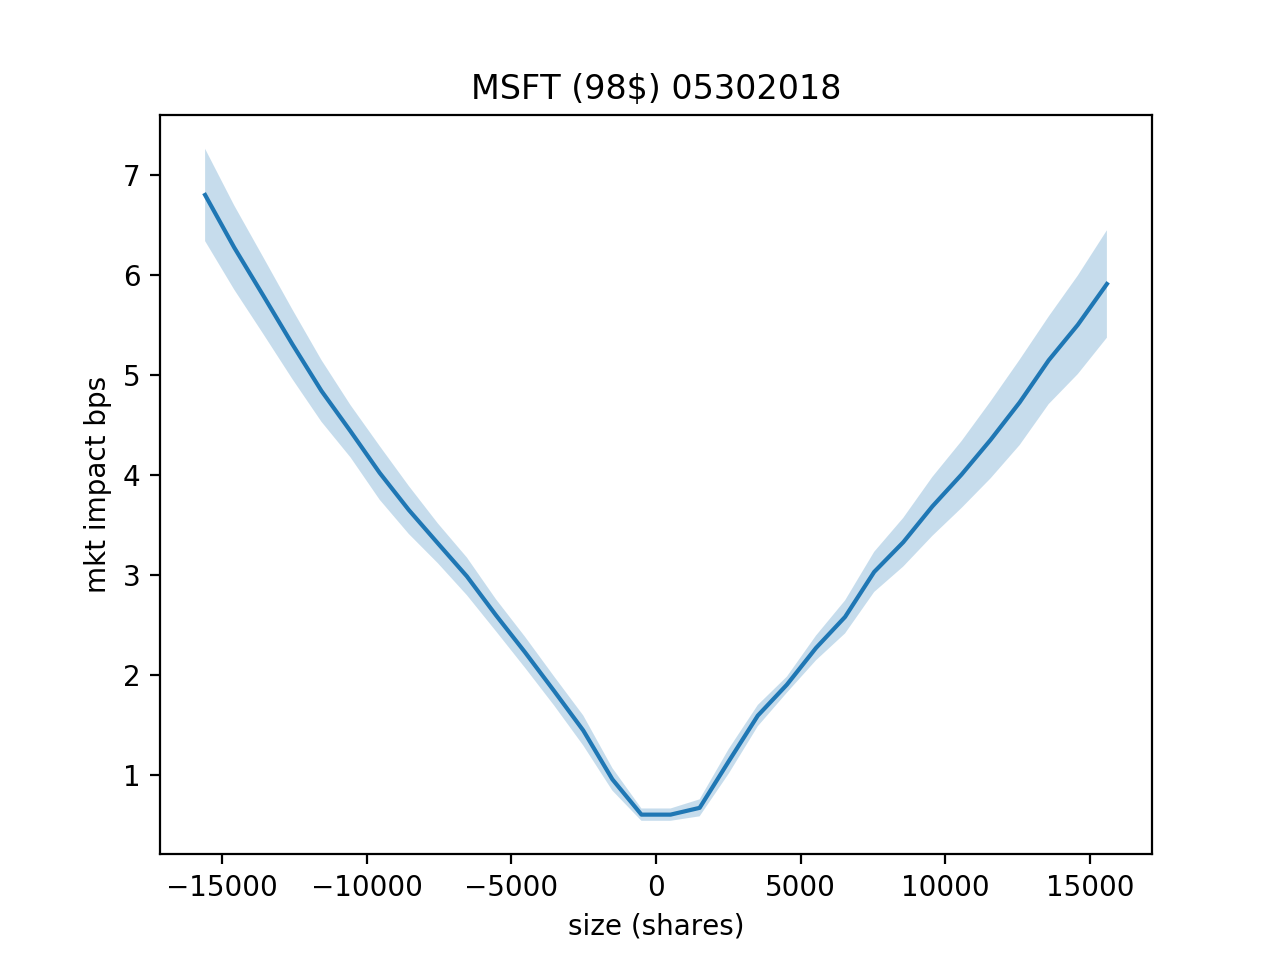

<IPython.core.display.Javascript object>


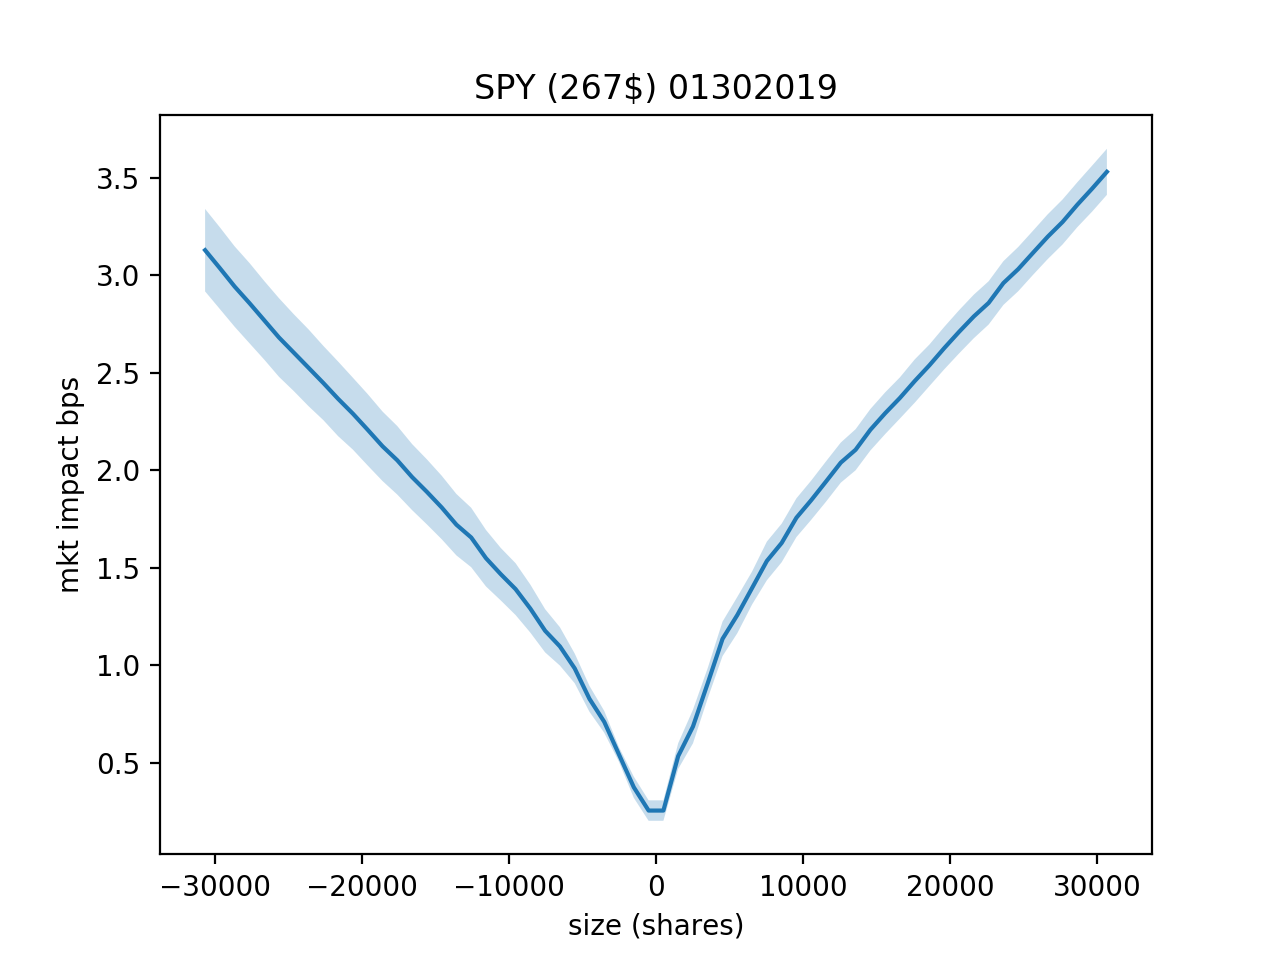

<IPython.core.display.Javascript object>


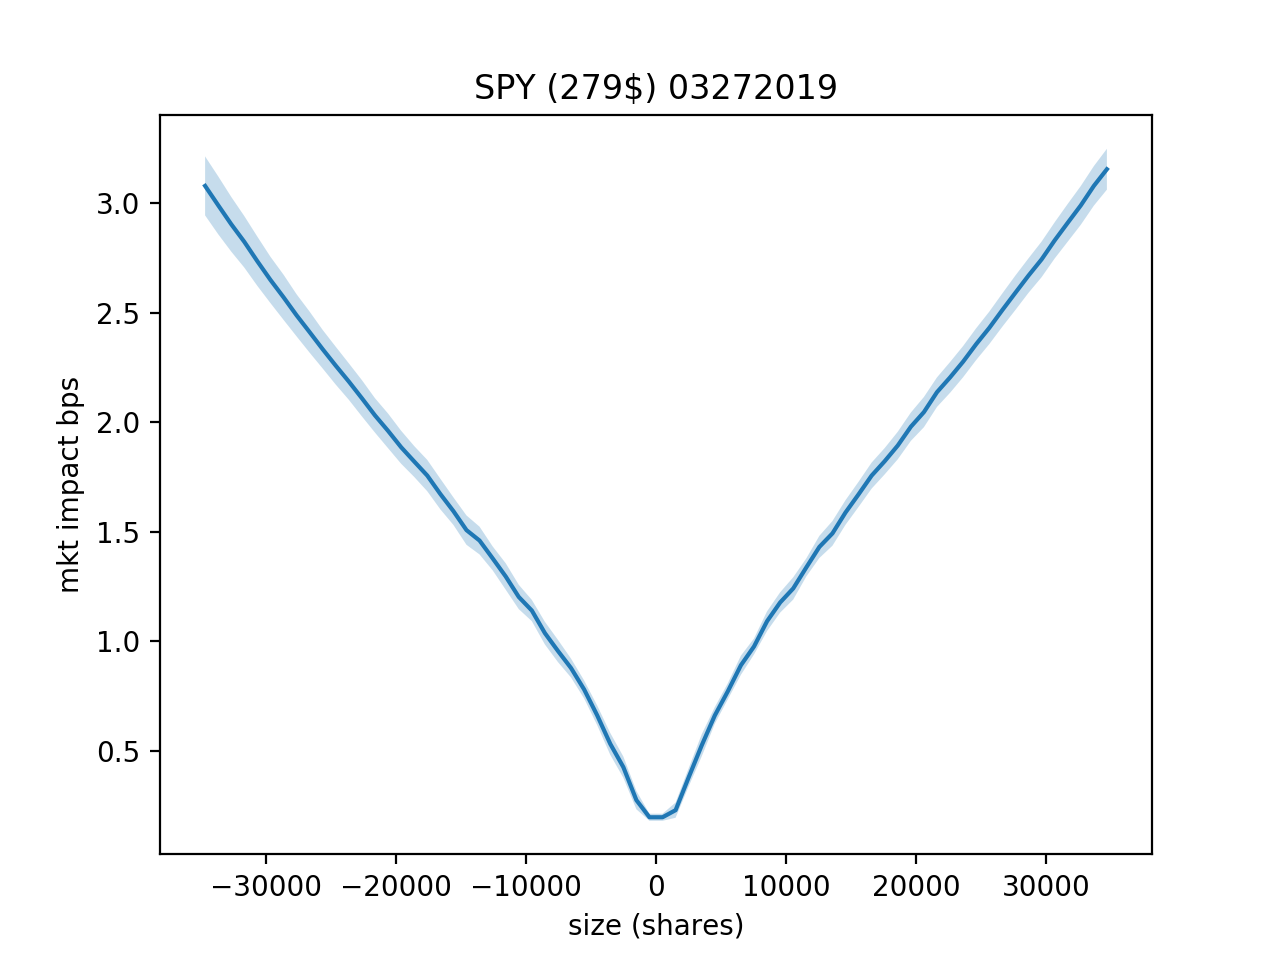

<IPython.core.display.Javascript object>


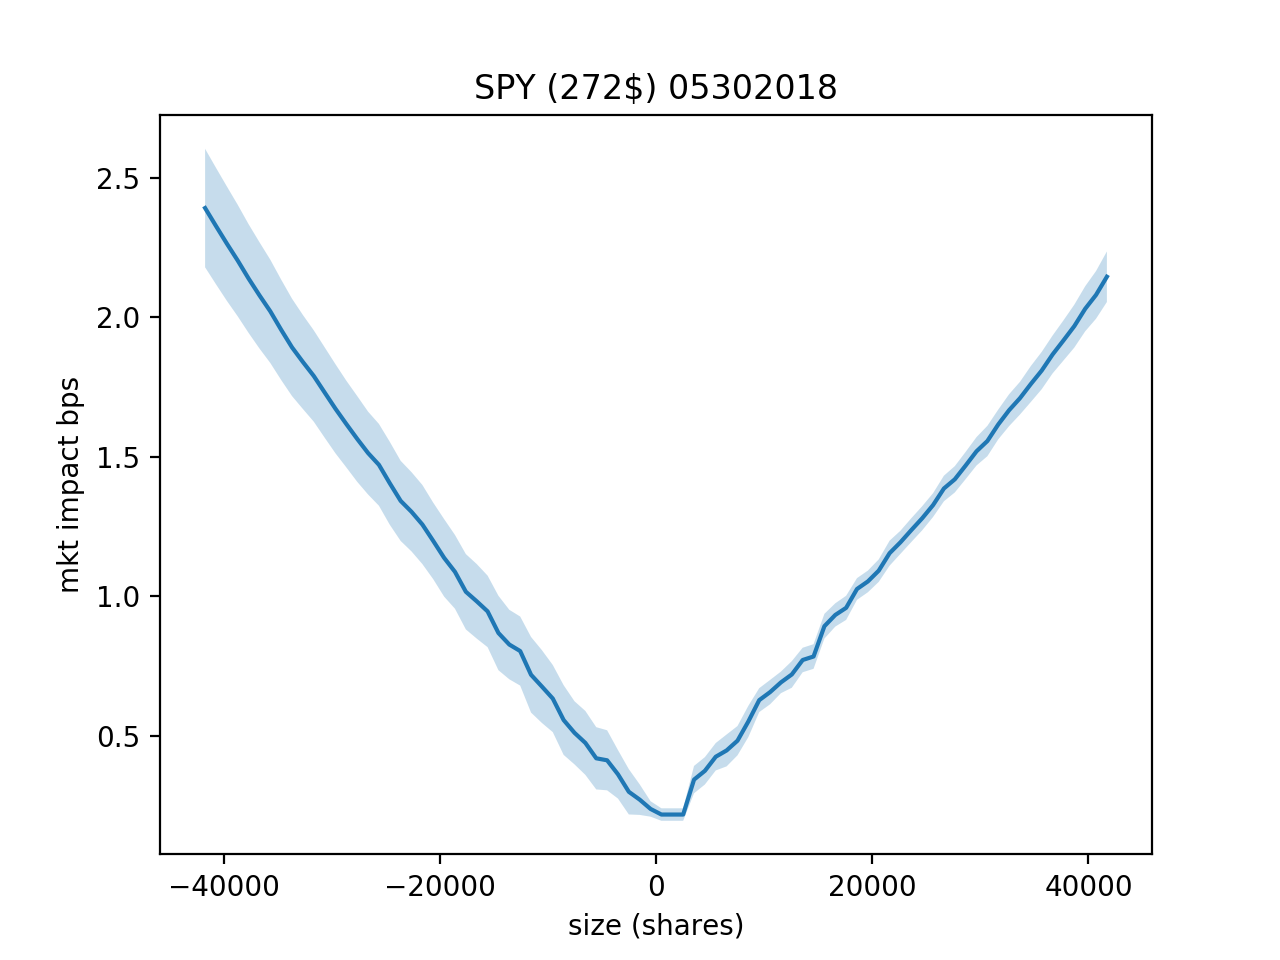

<IPython.core.display.Javascript object>


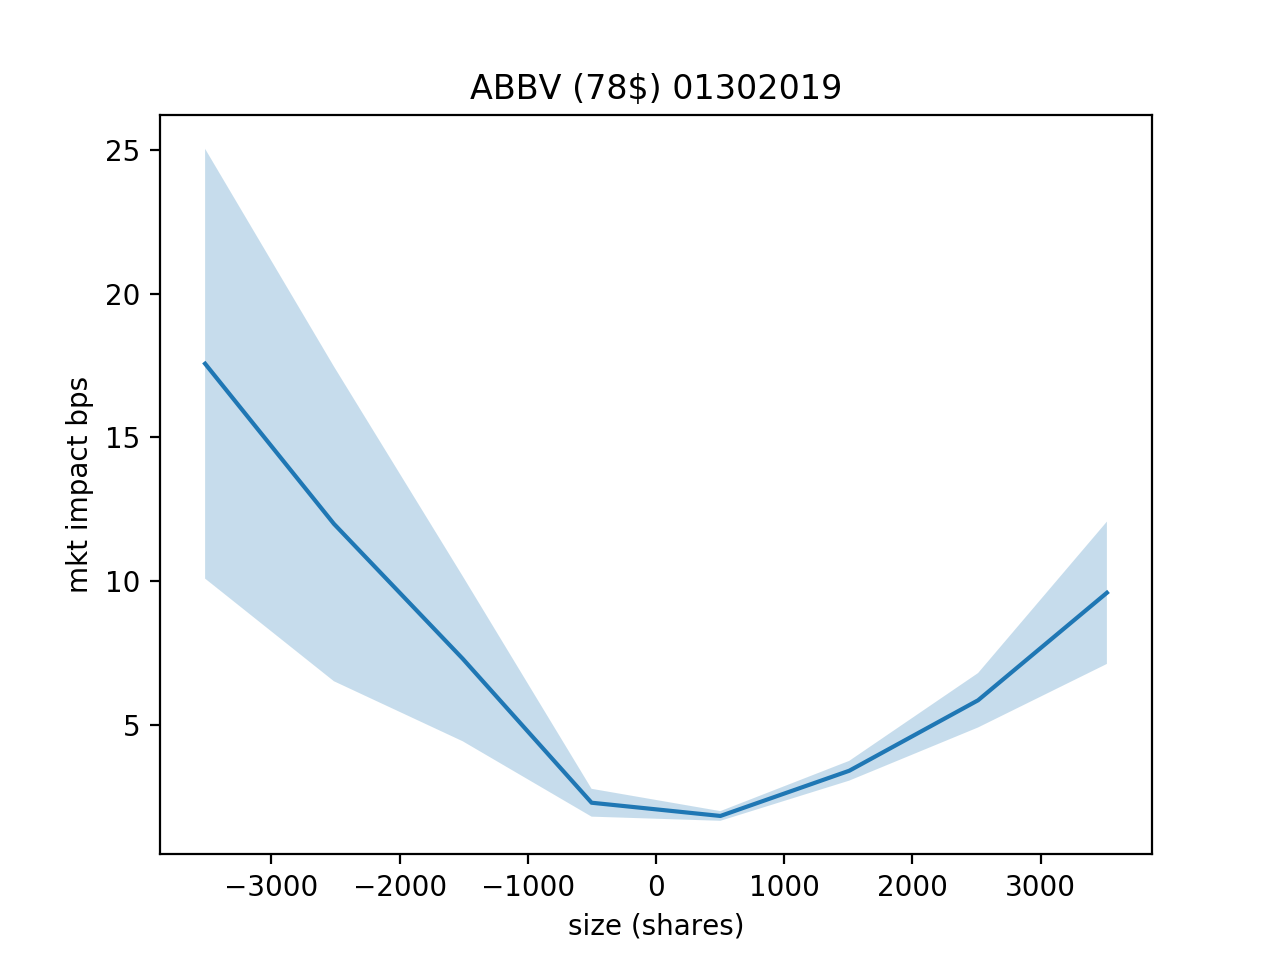

<IPython.core.display.Javascript object>


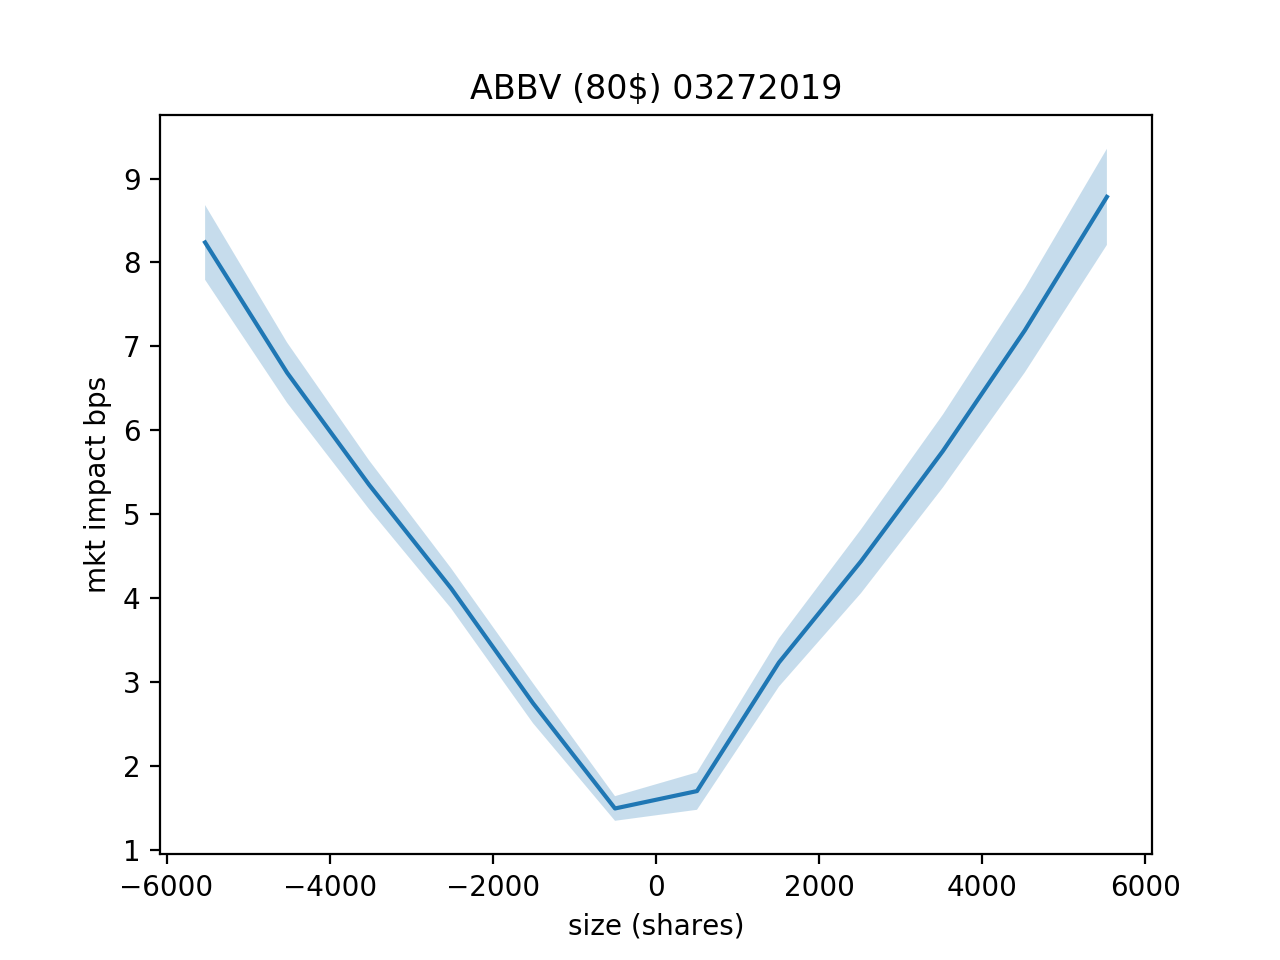

<IPython.core.display.Javascript object>


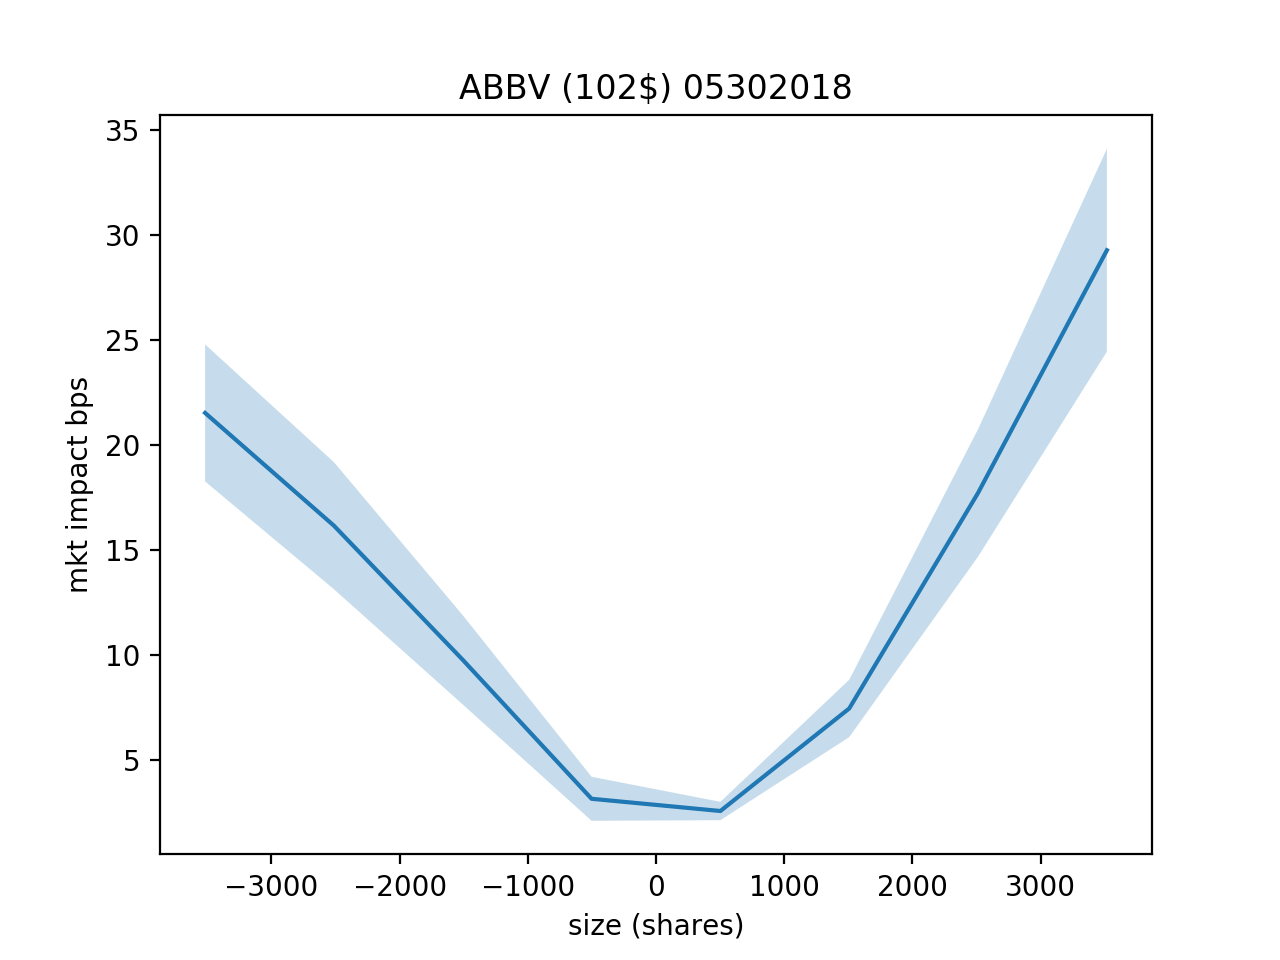

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


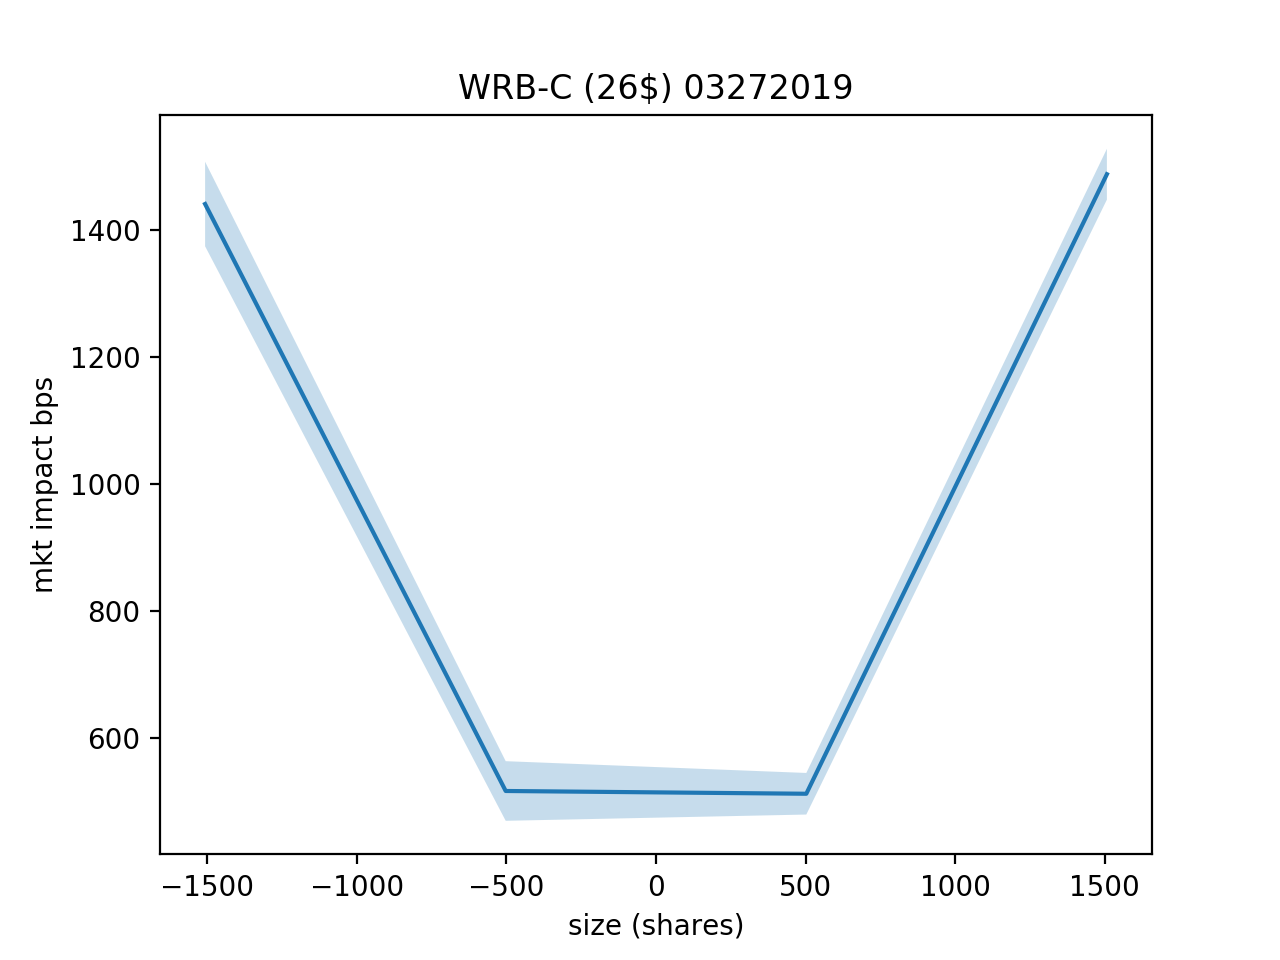

<IPython.core.display.Javascript object>


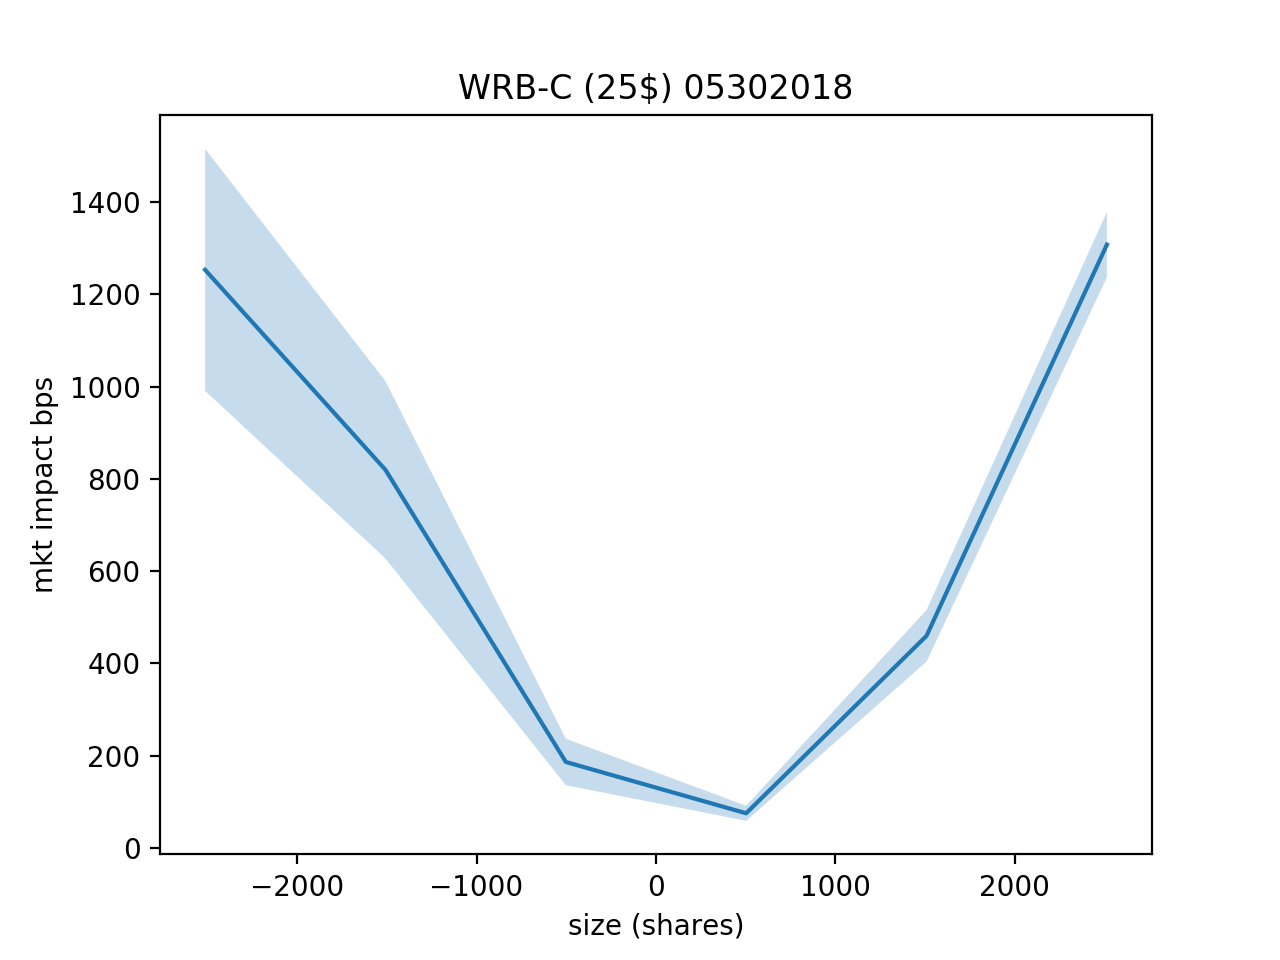

<IPython.core.display.Javascript object>


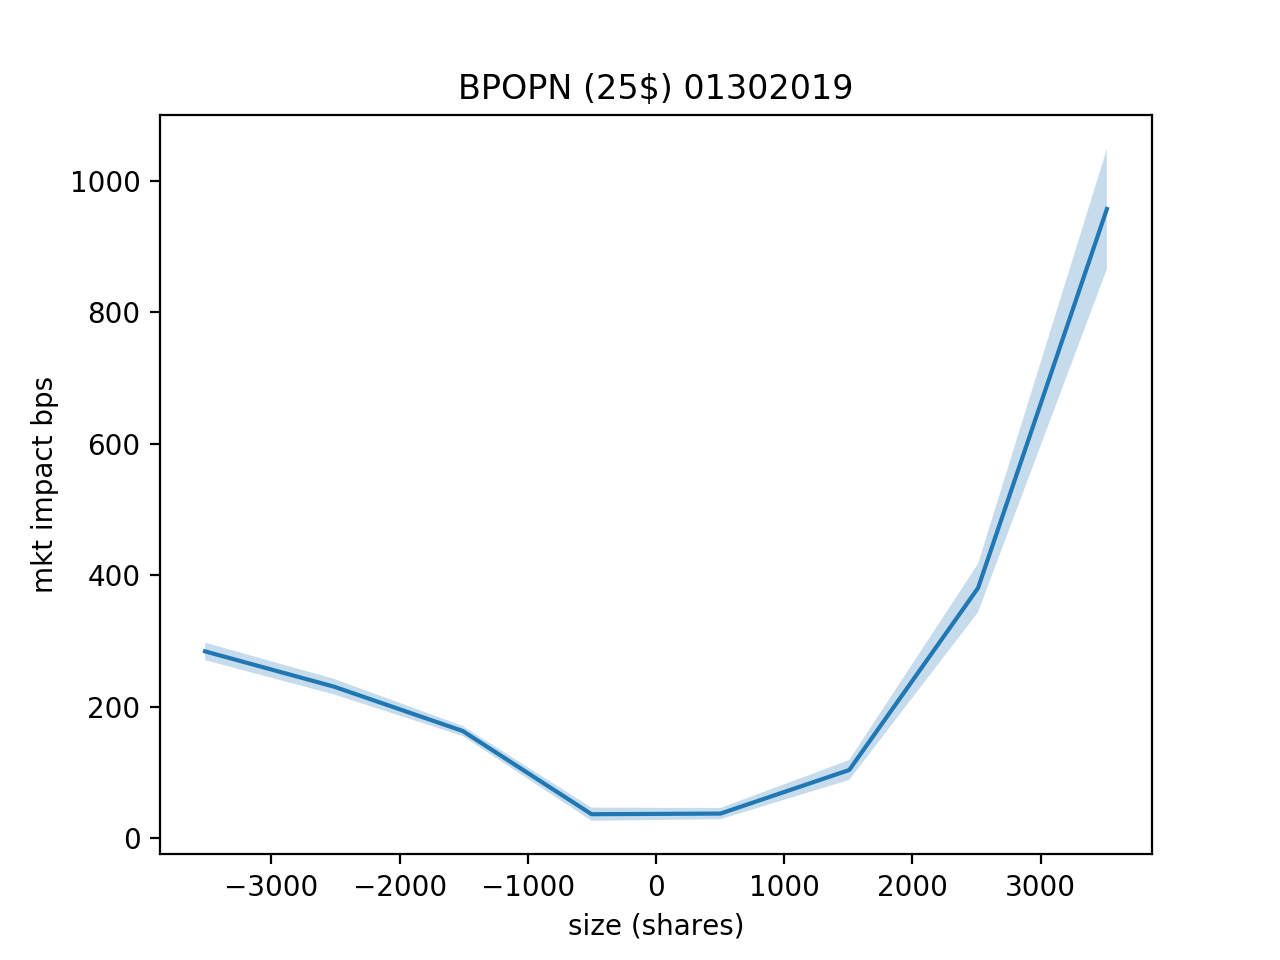

<IPython.core.display.Javascript object>


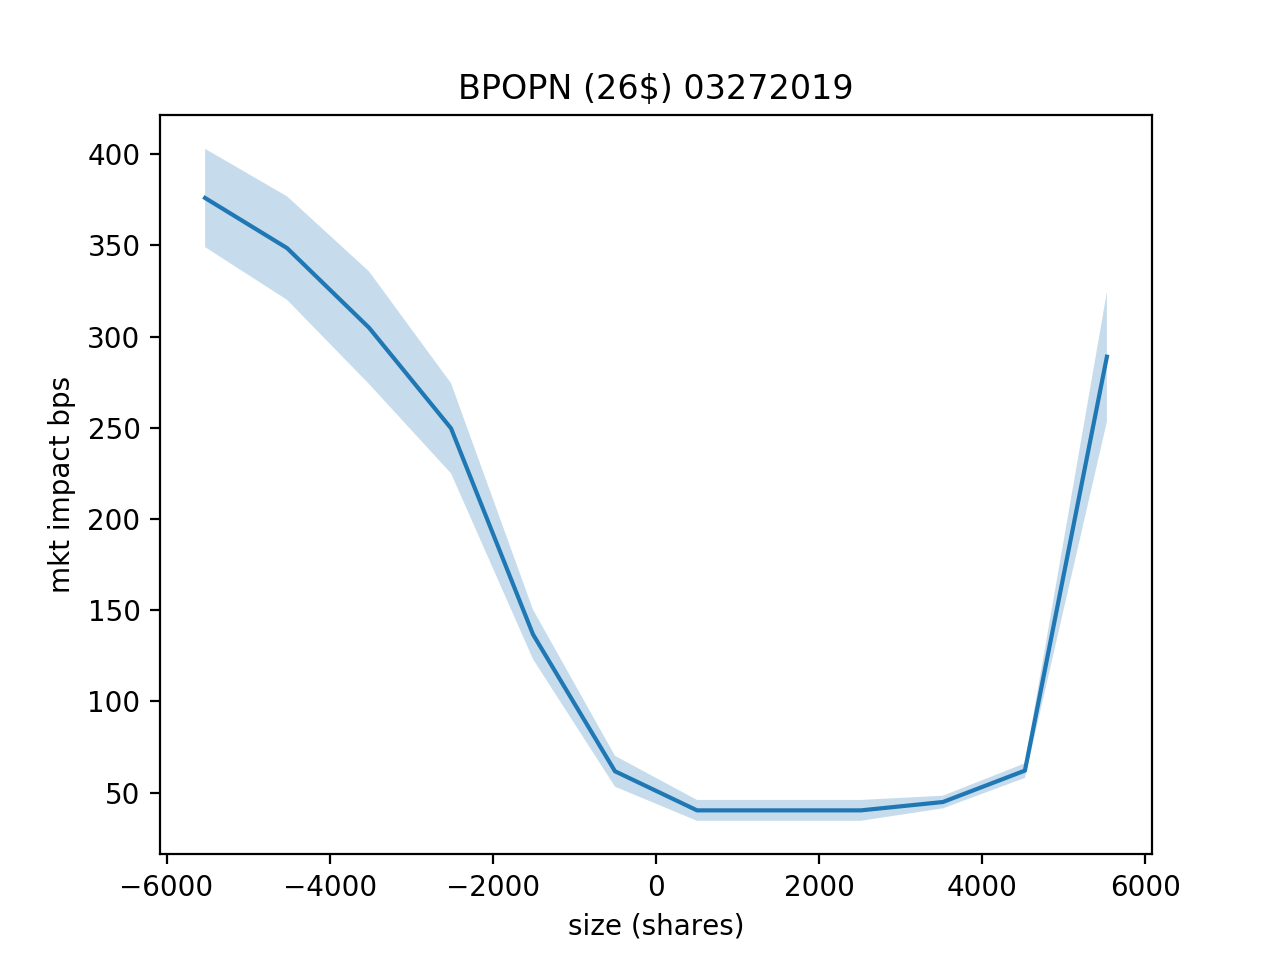

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


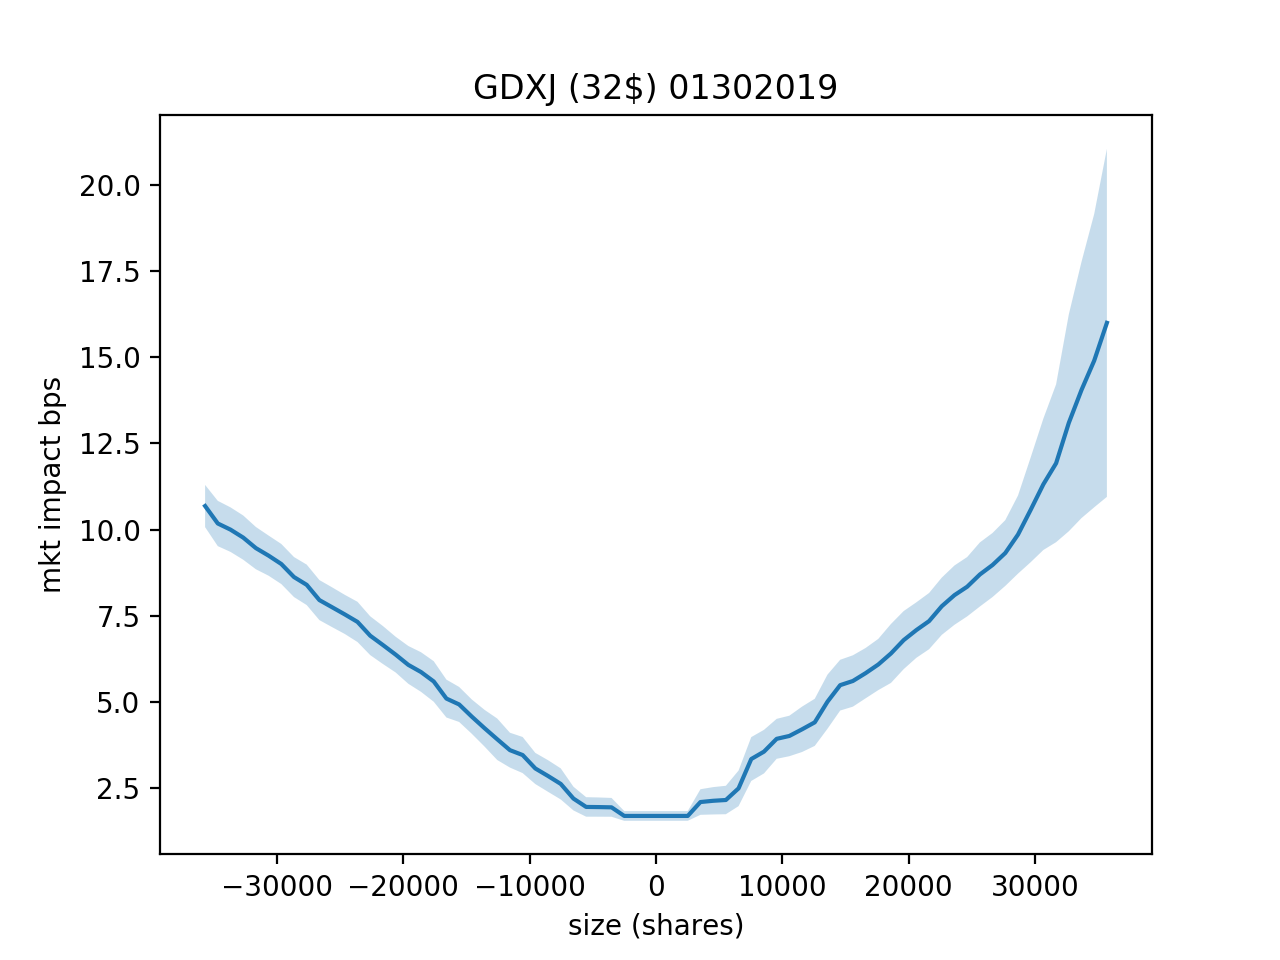

<IPython.core.display.Javascript object>


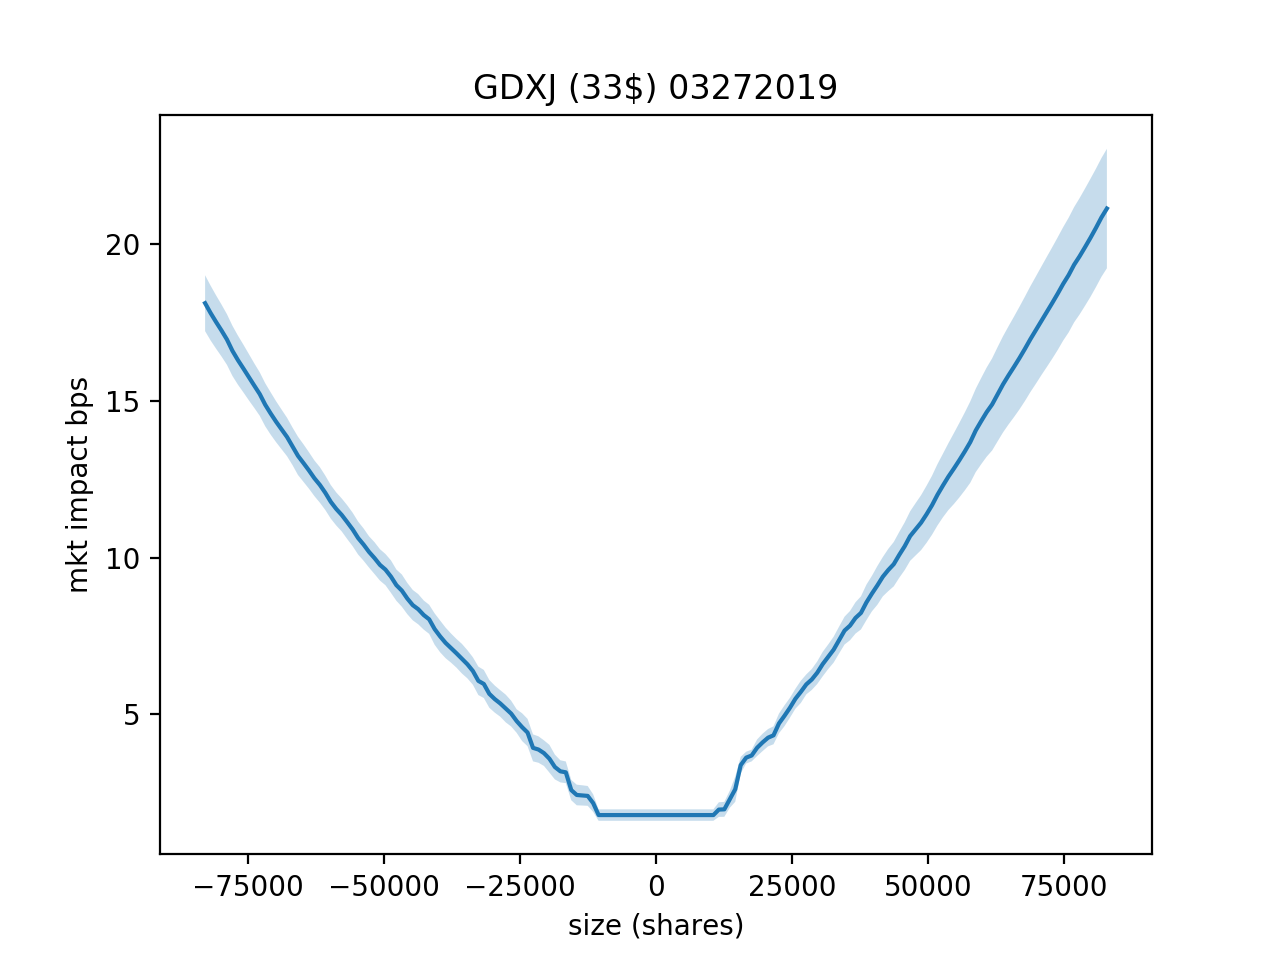

<IPython.core.display.Javascript object>


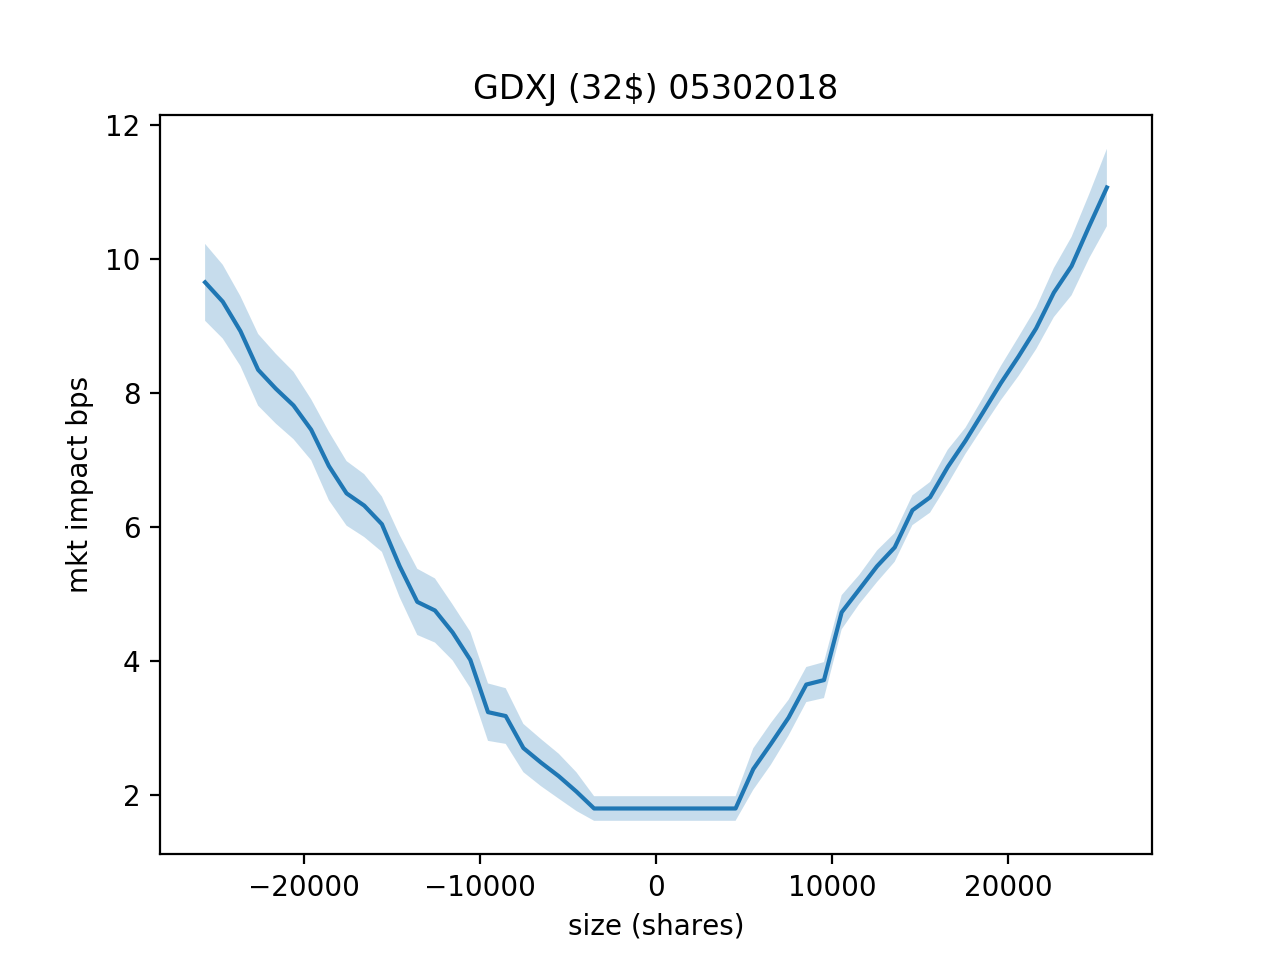

<IPython.core.display.Javascript object>


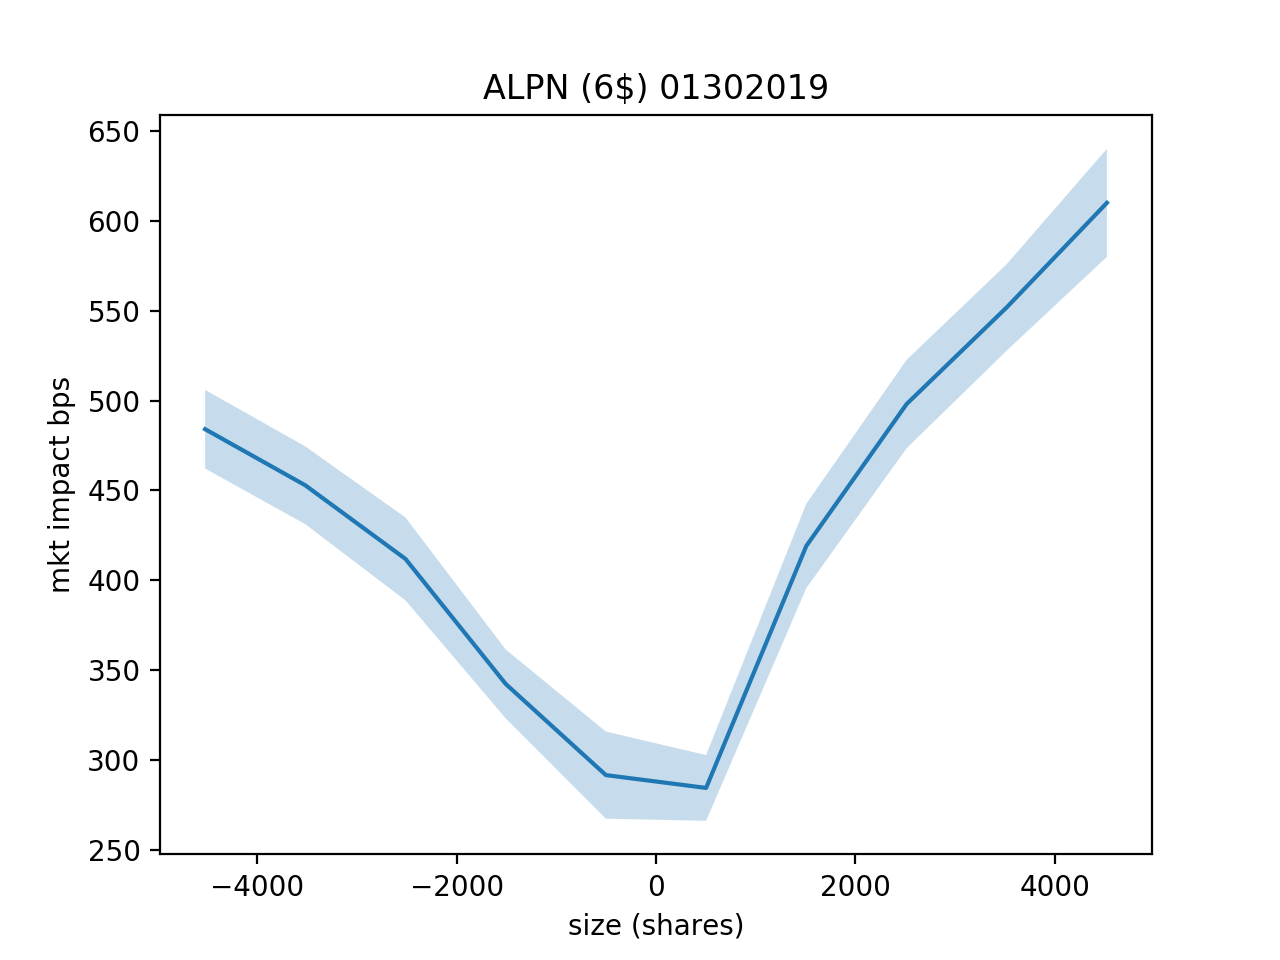

<IPython.core.display.Javascript object>


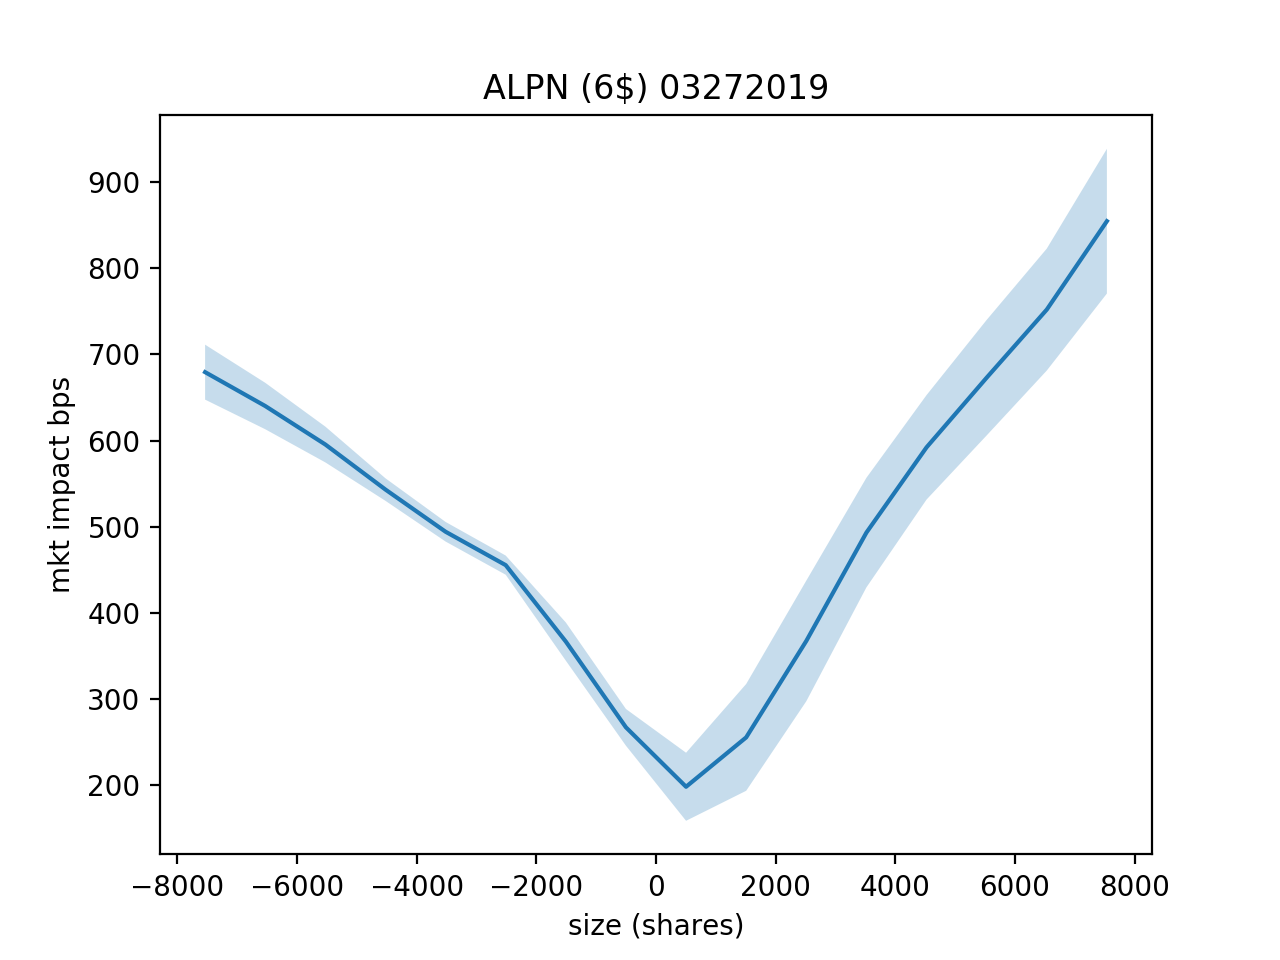

<IPython.core.display.Javascript object>


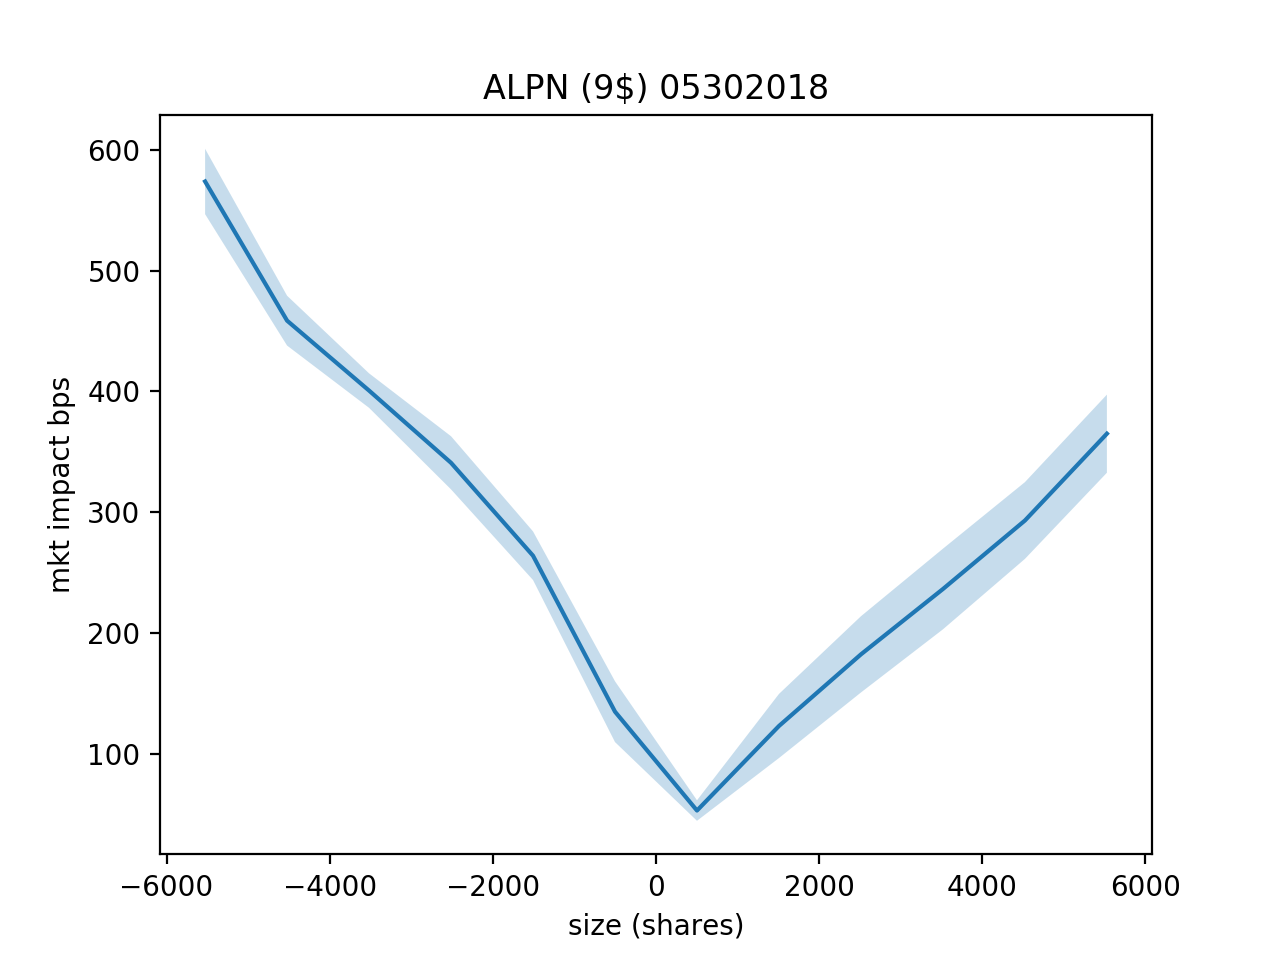

<IPython.core.display.Javascript object>


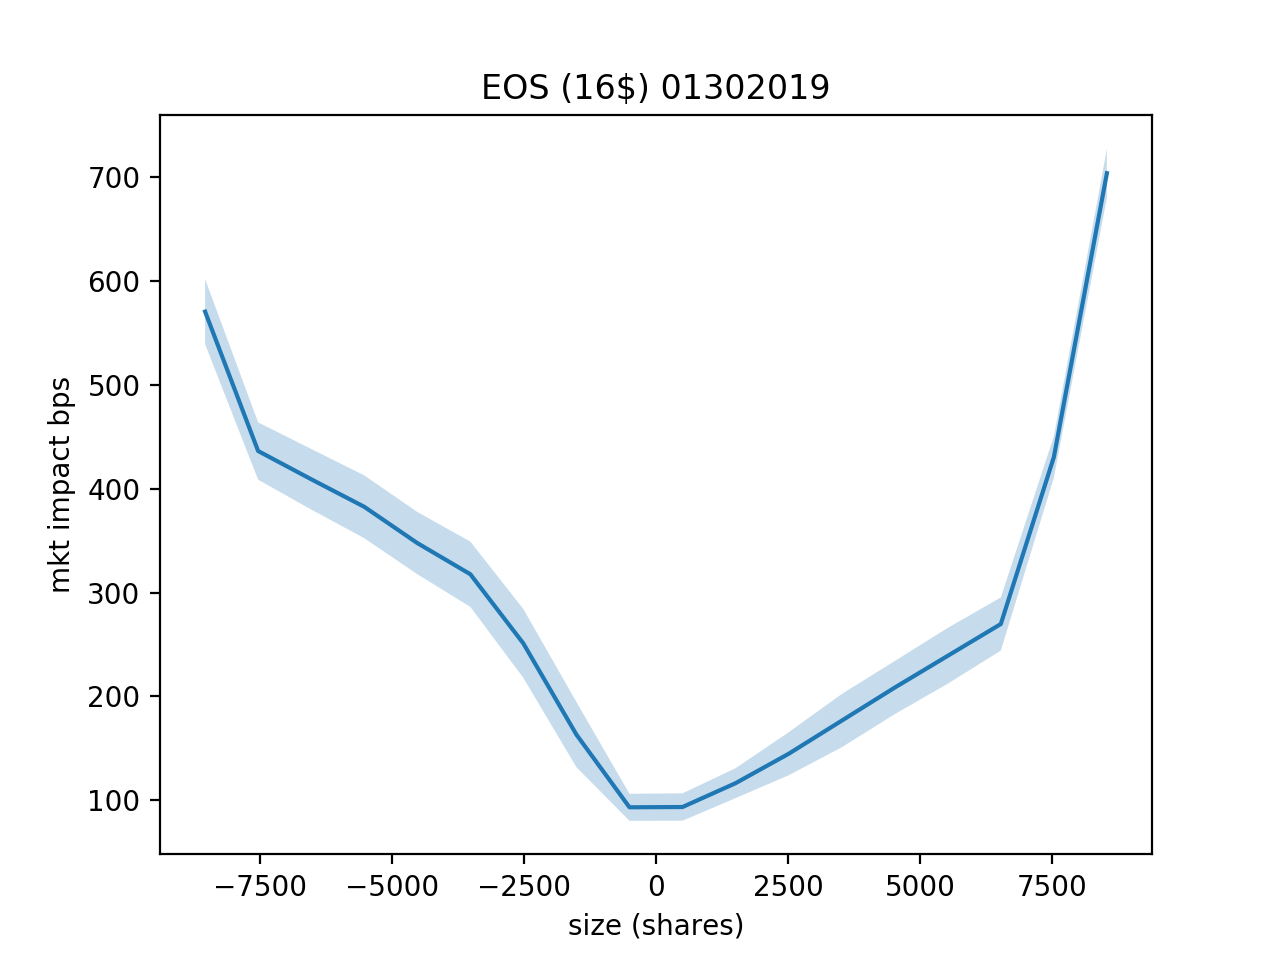

<IPython.core.display.Javascript object>


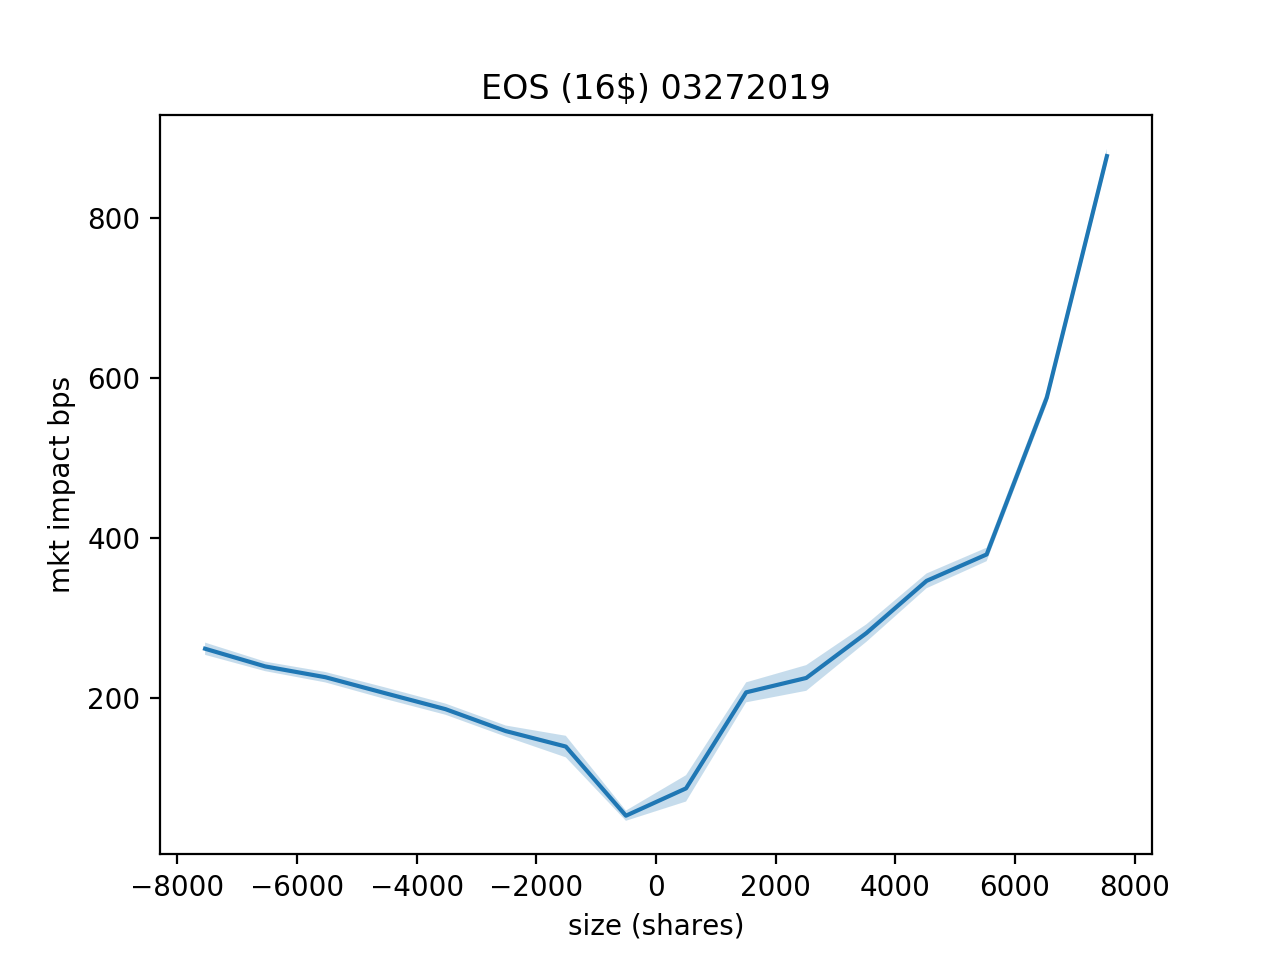

<IPython.core.display.Javascript object>


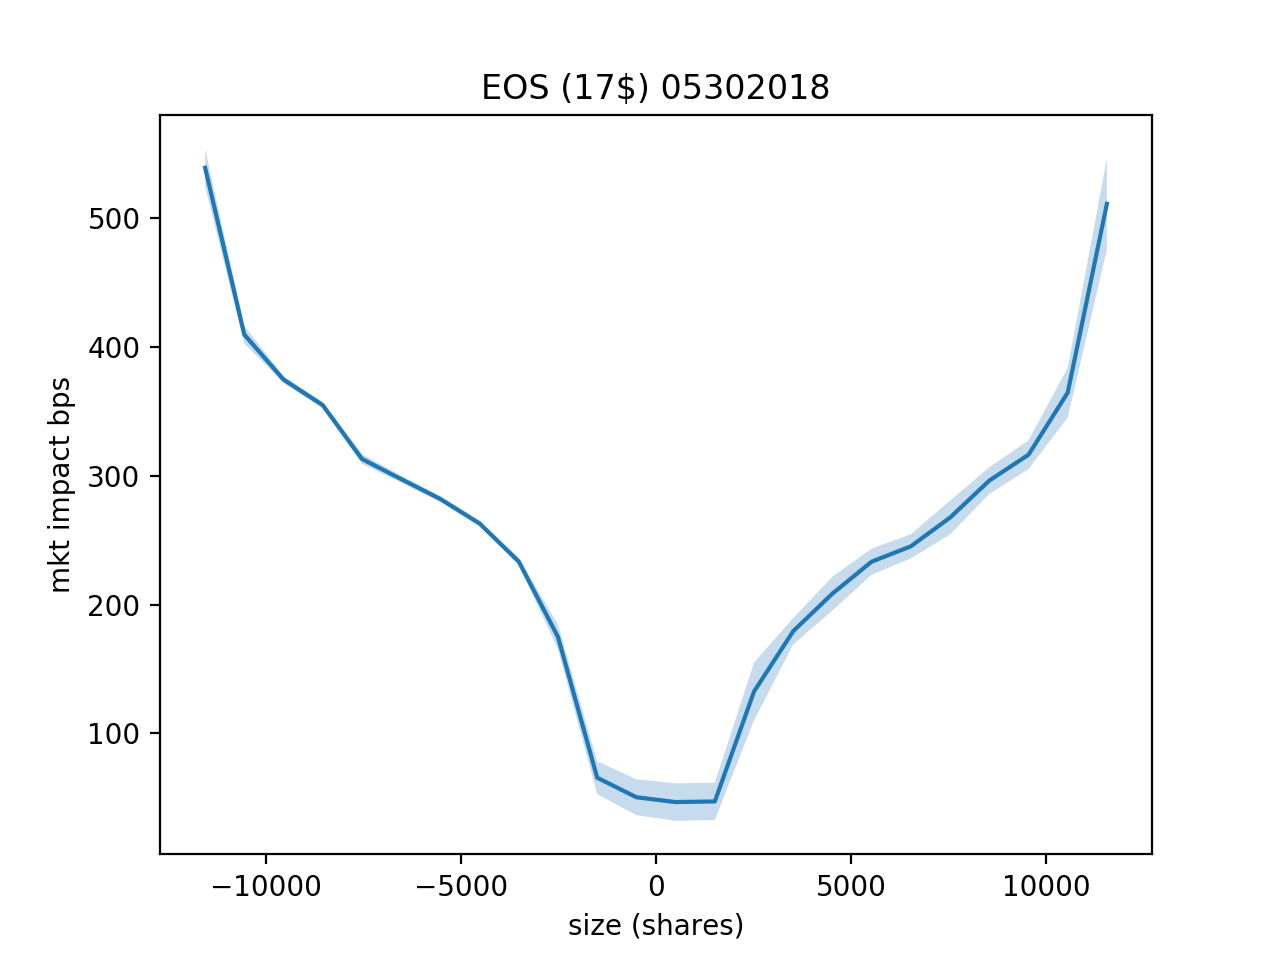

<IPython.core.display.Javascript object>


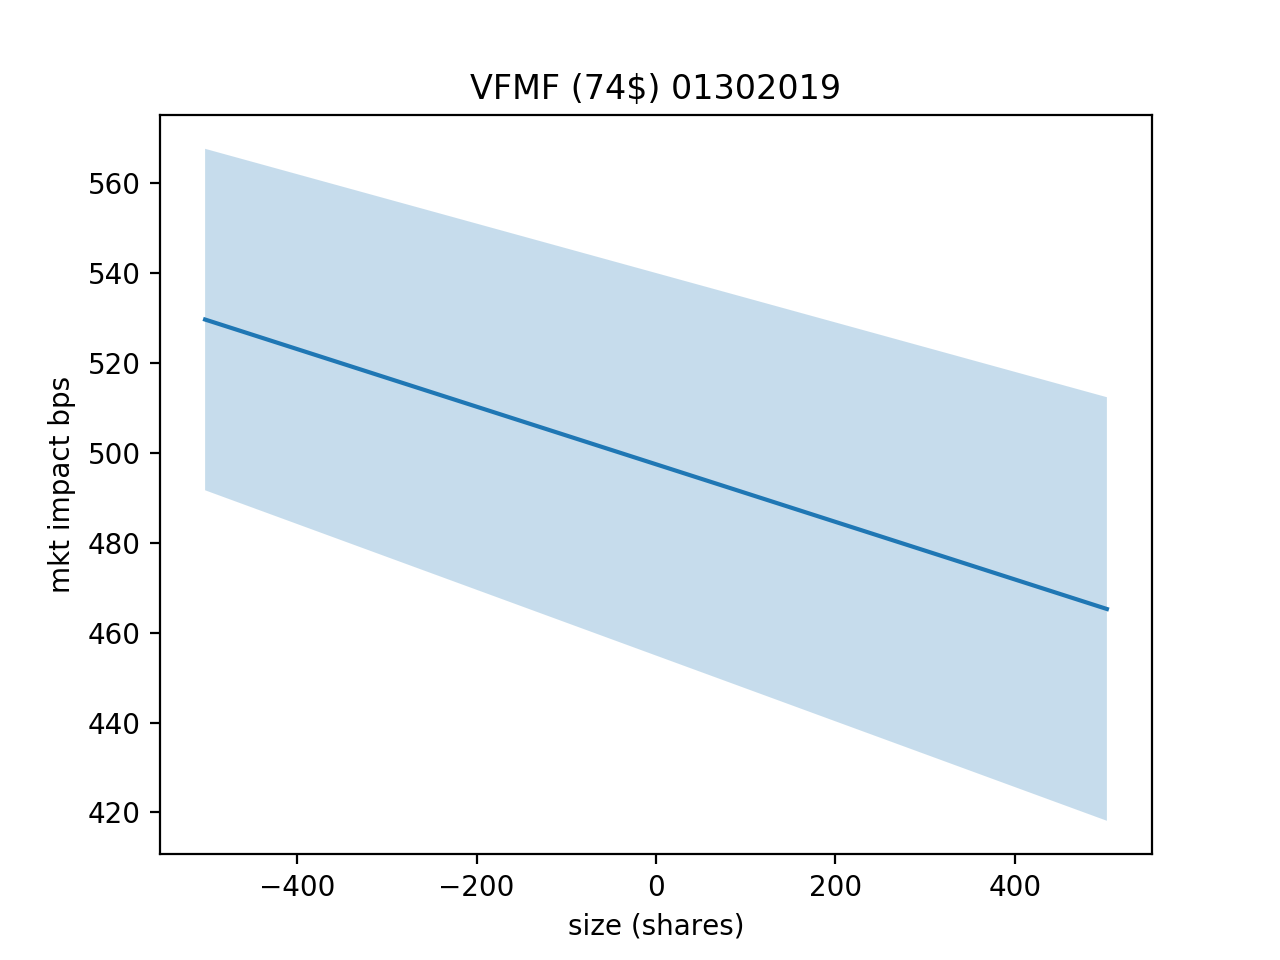

<IPython.core.display.Javascript object>


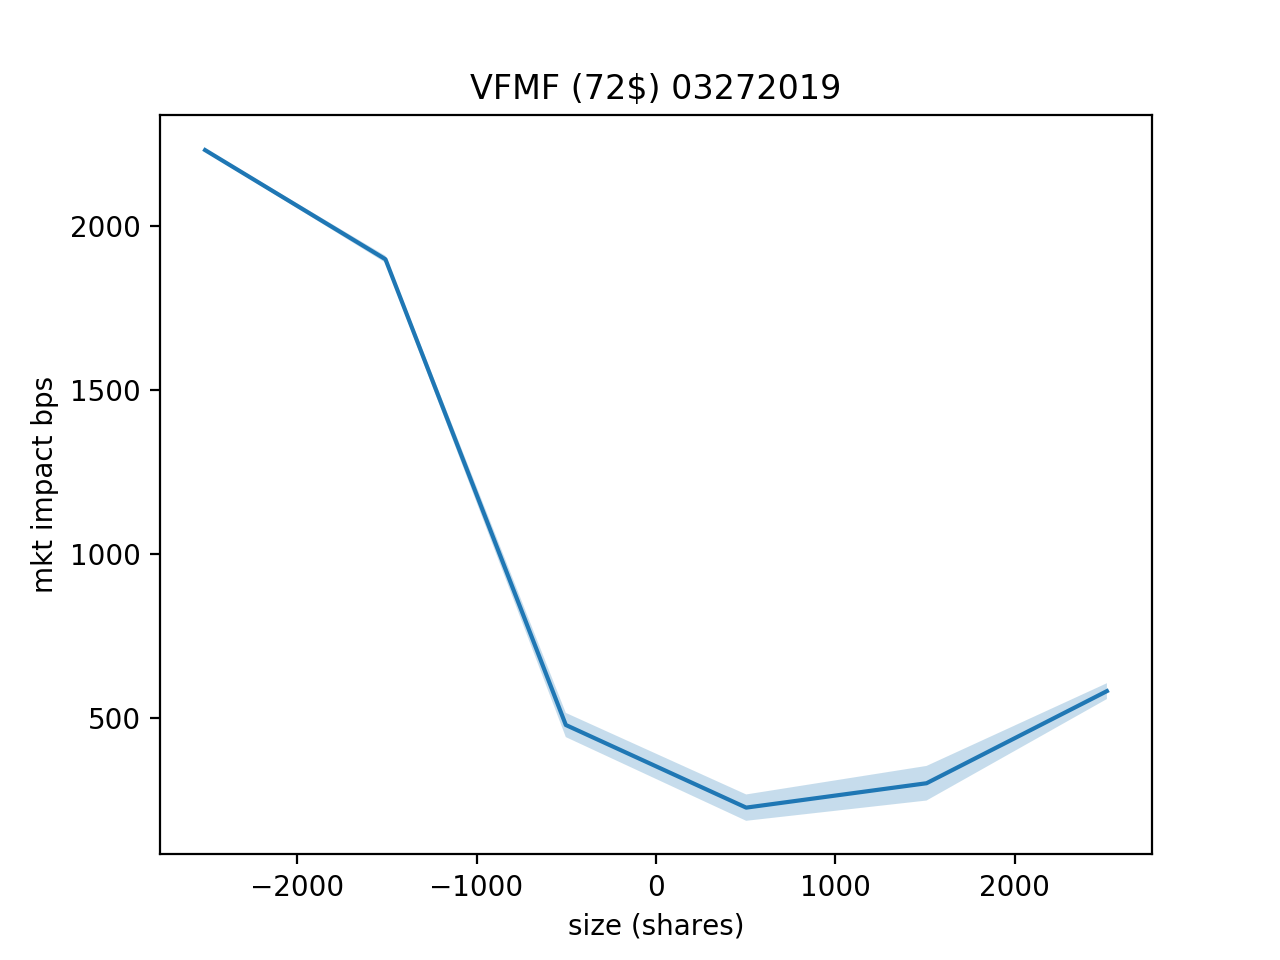

<IPython.core.display.Javascript object>


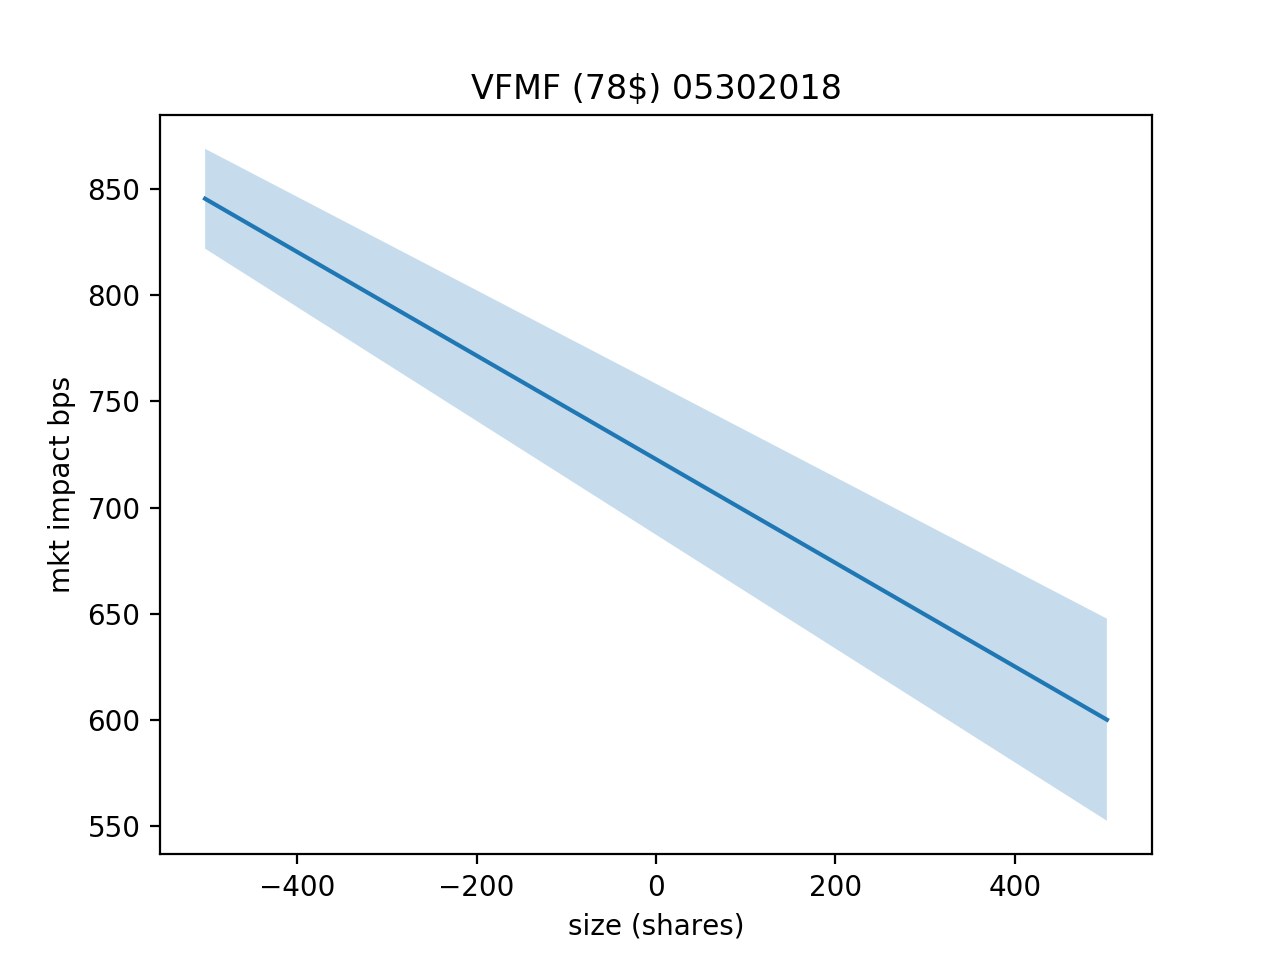

<IPython.core.display.Javascript object>


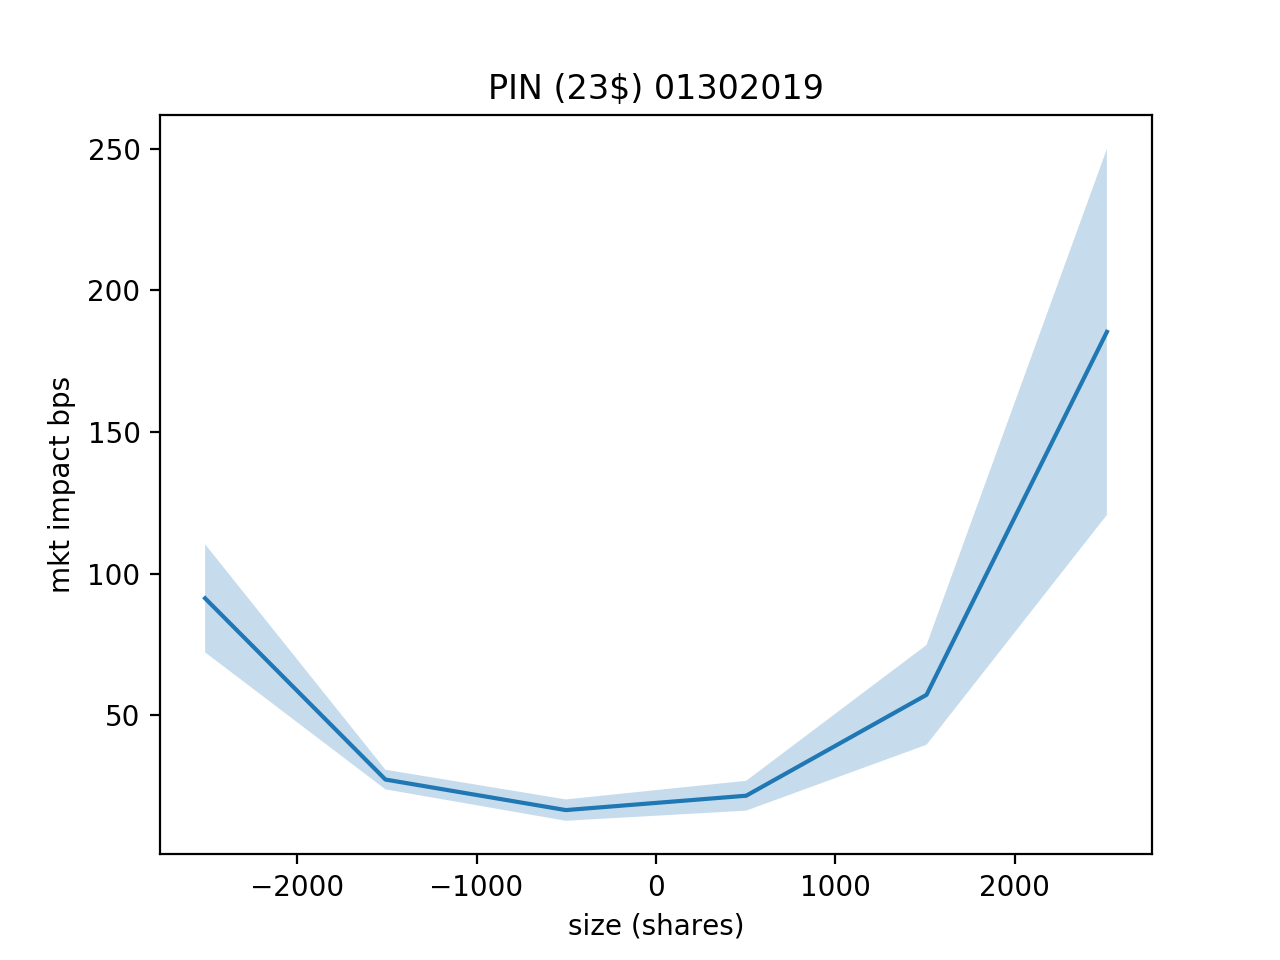

<IPython.core.display.Javascript object>


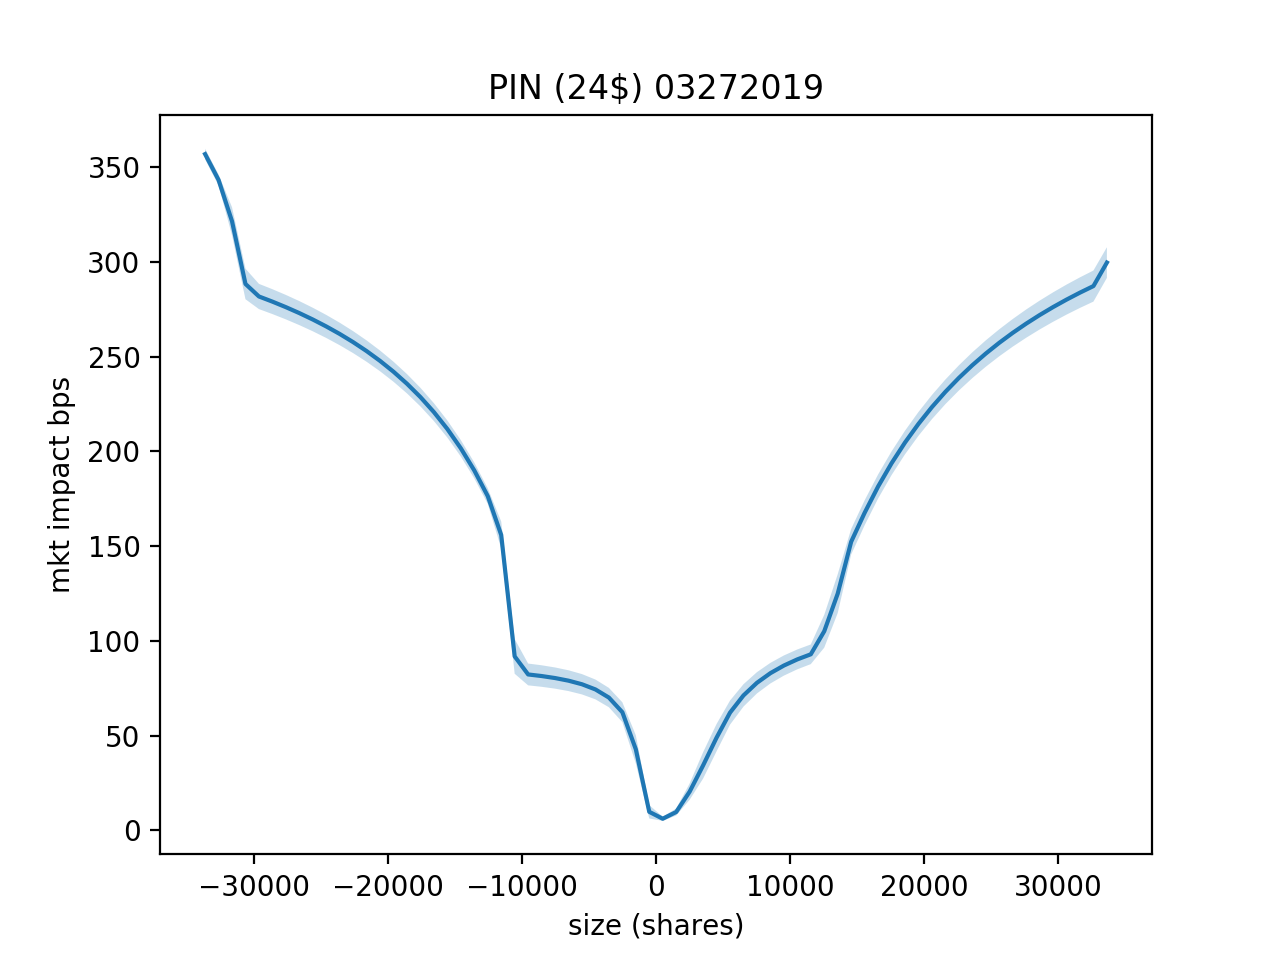

<IPython.core.display.Javascript object>


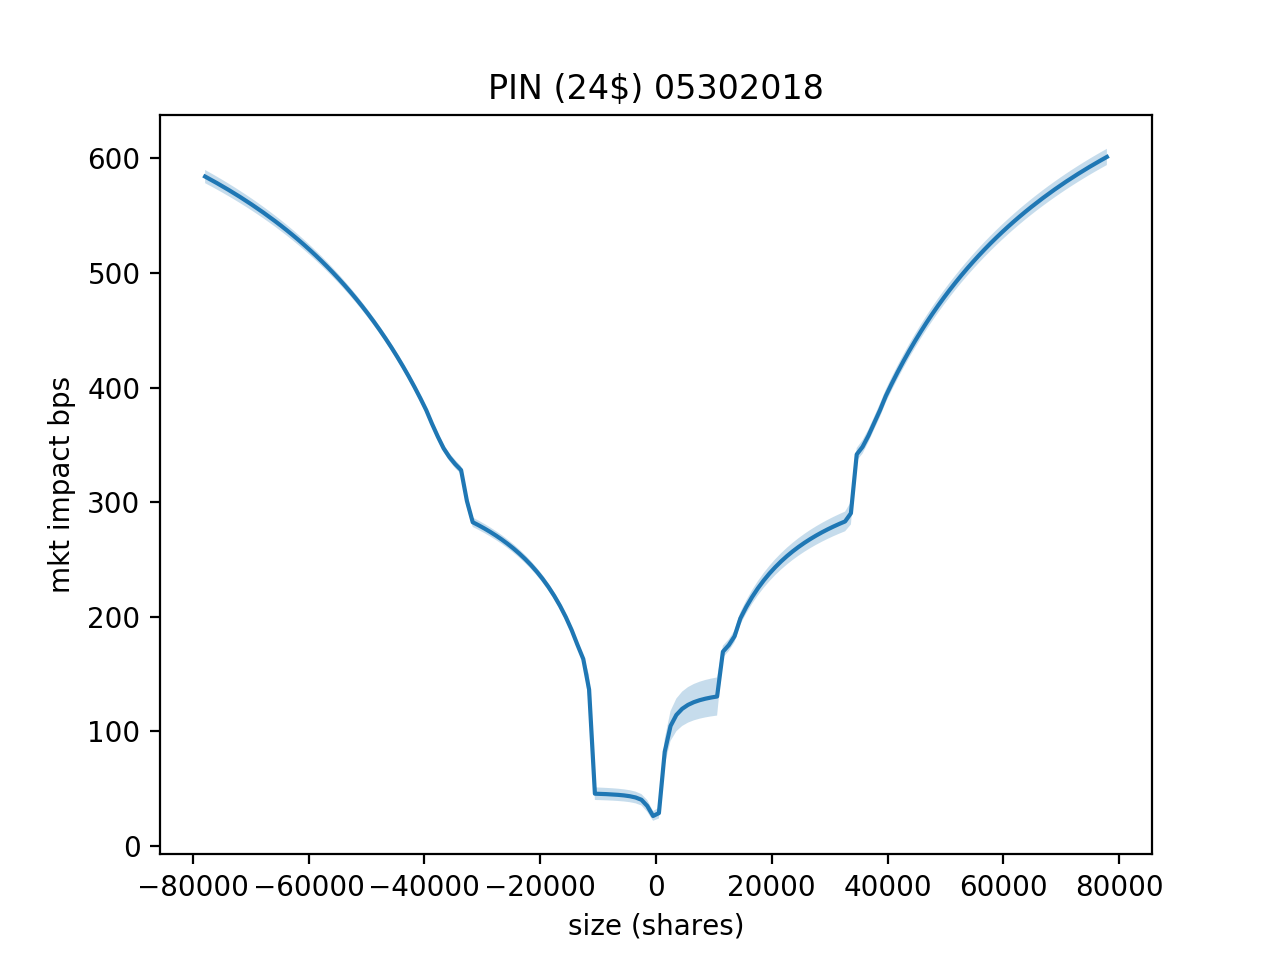

<IPython.core.display.Javascript object>


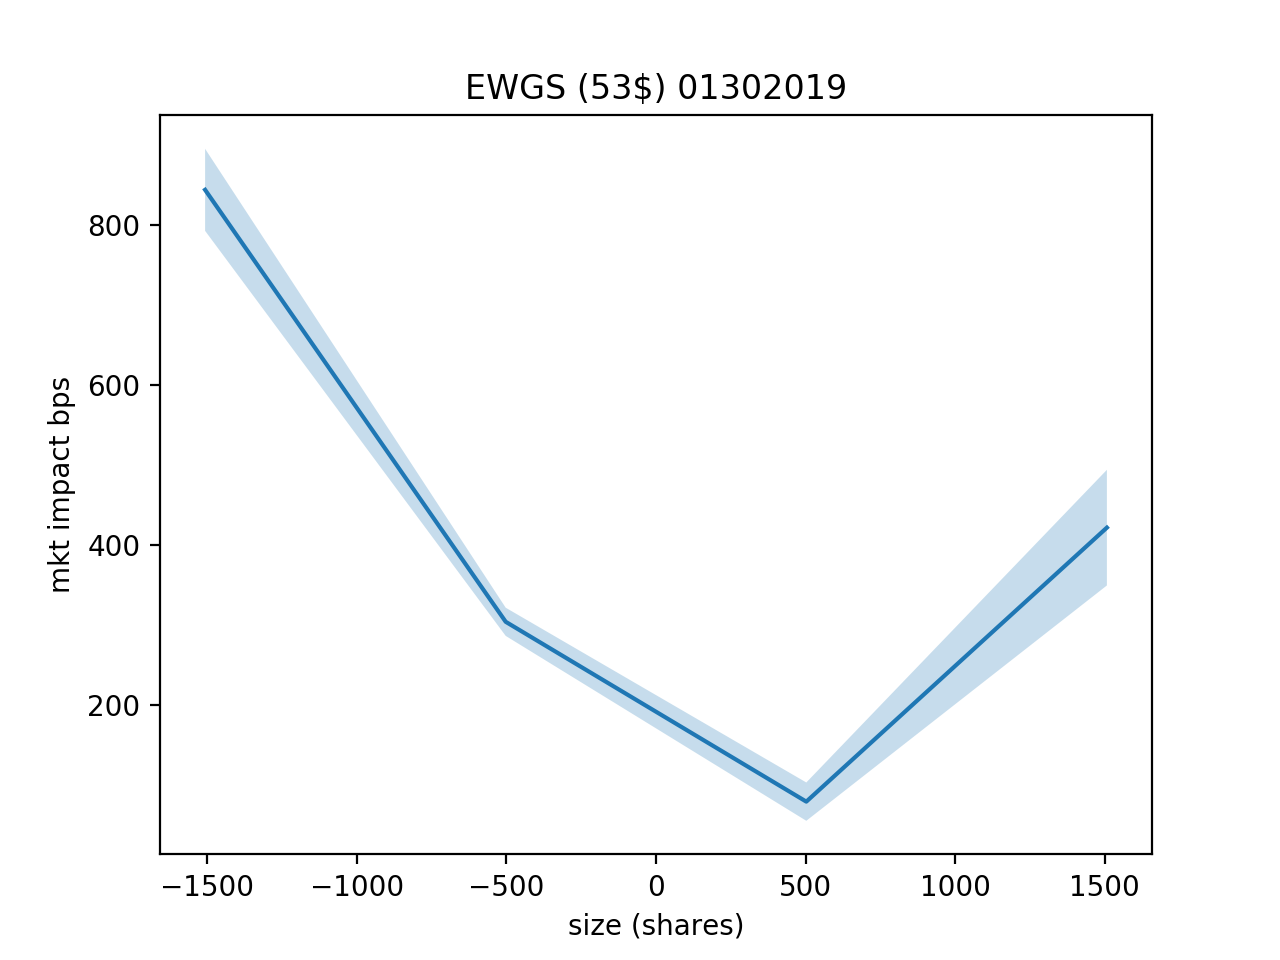

<IPython.core.display.Javascript object>


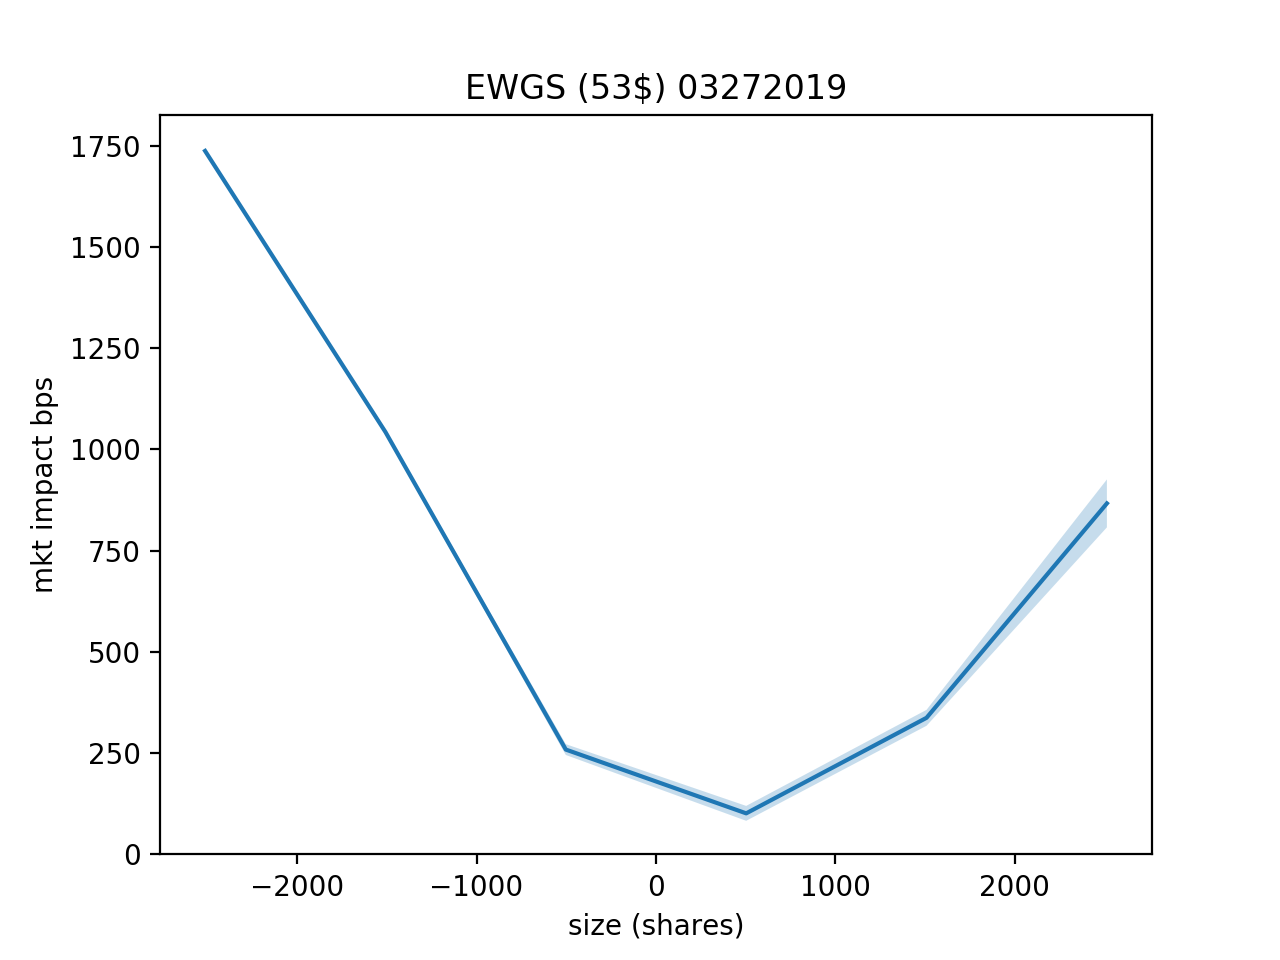

<IPython.core.display.Javascript object>


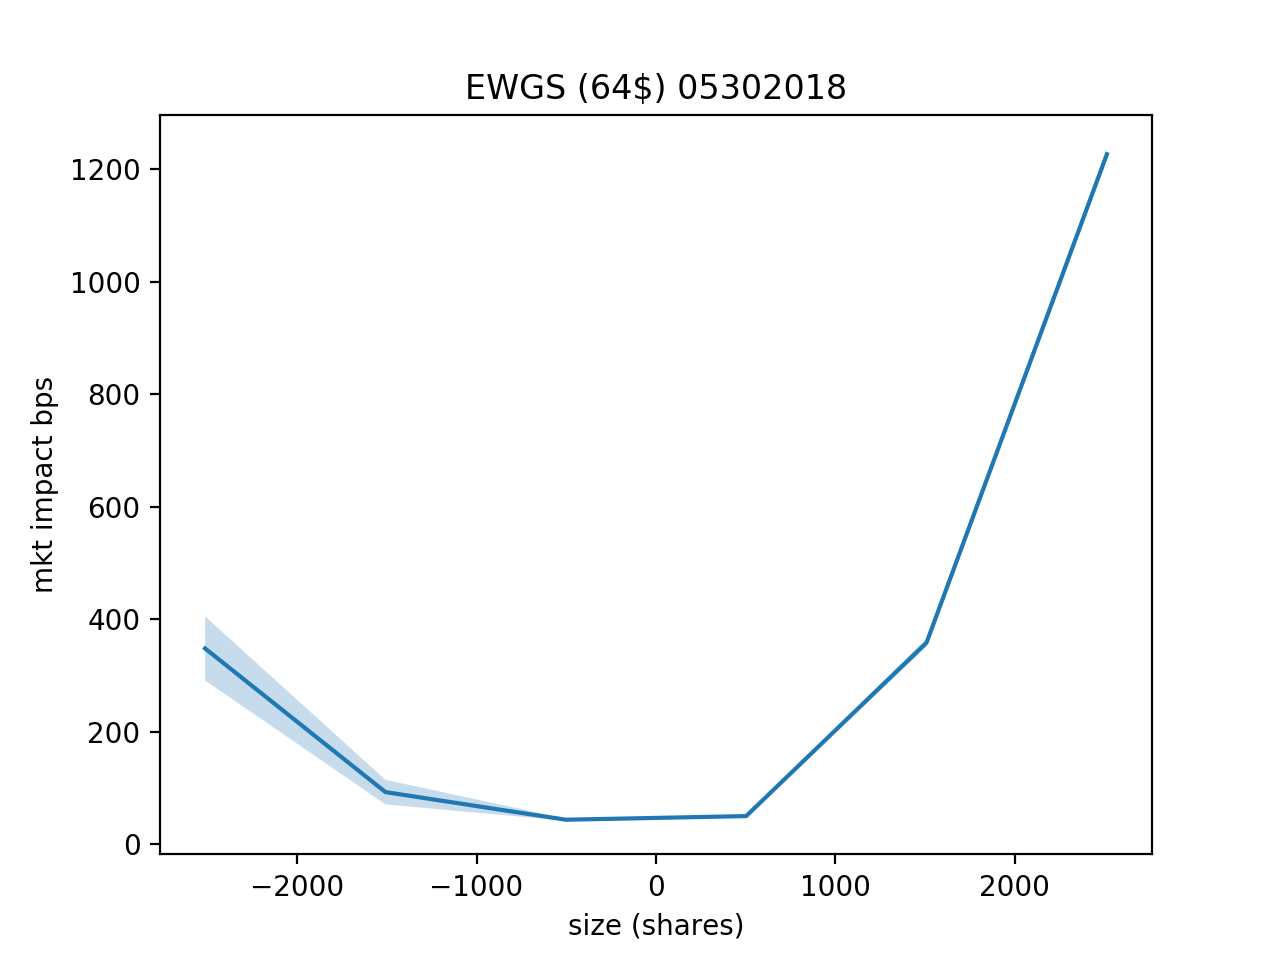

<IPython.core.display.Javascript object>


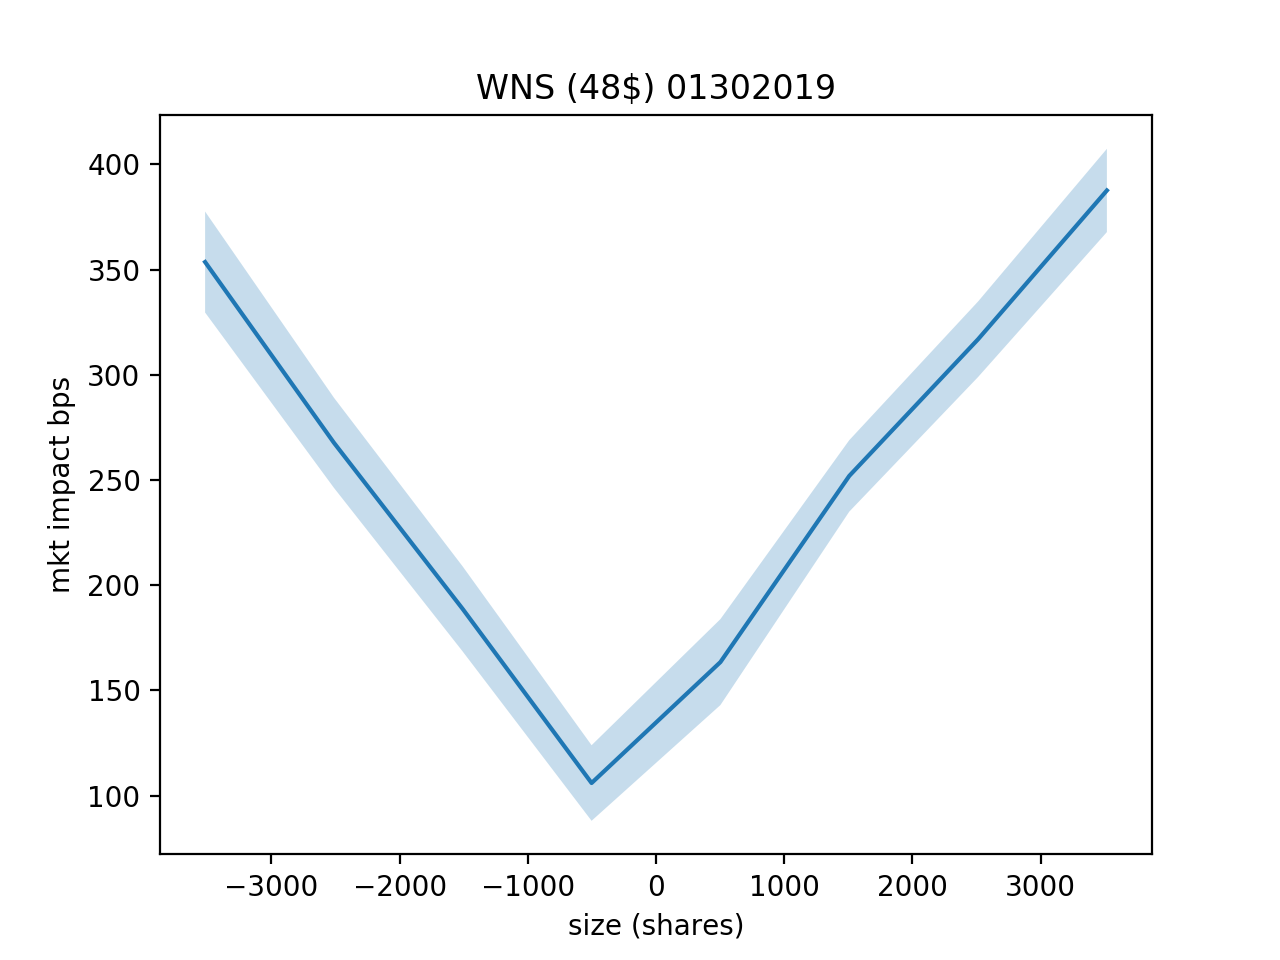

<IPython.core.display.Javascript object>


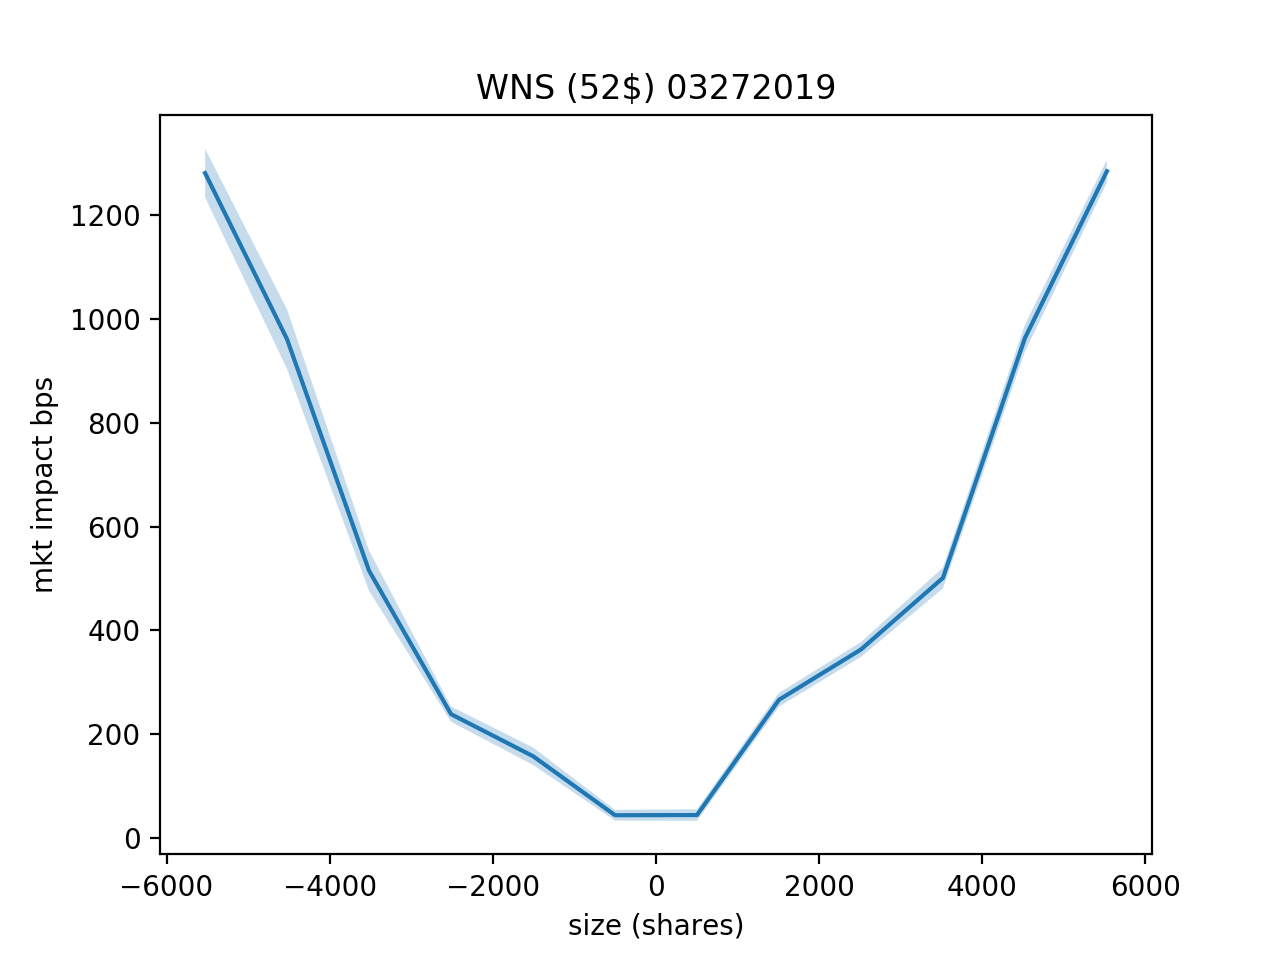

<IPython.core.display.Javascript object>


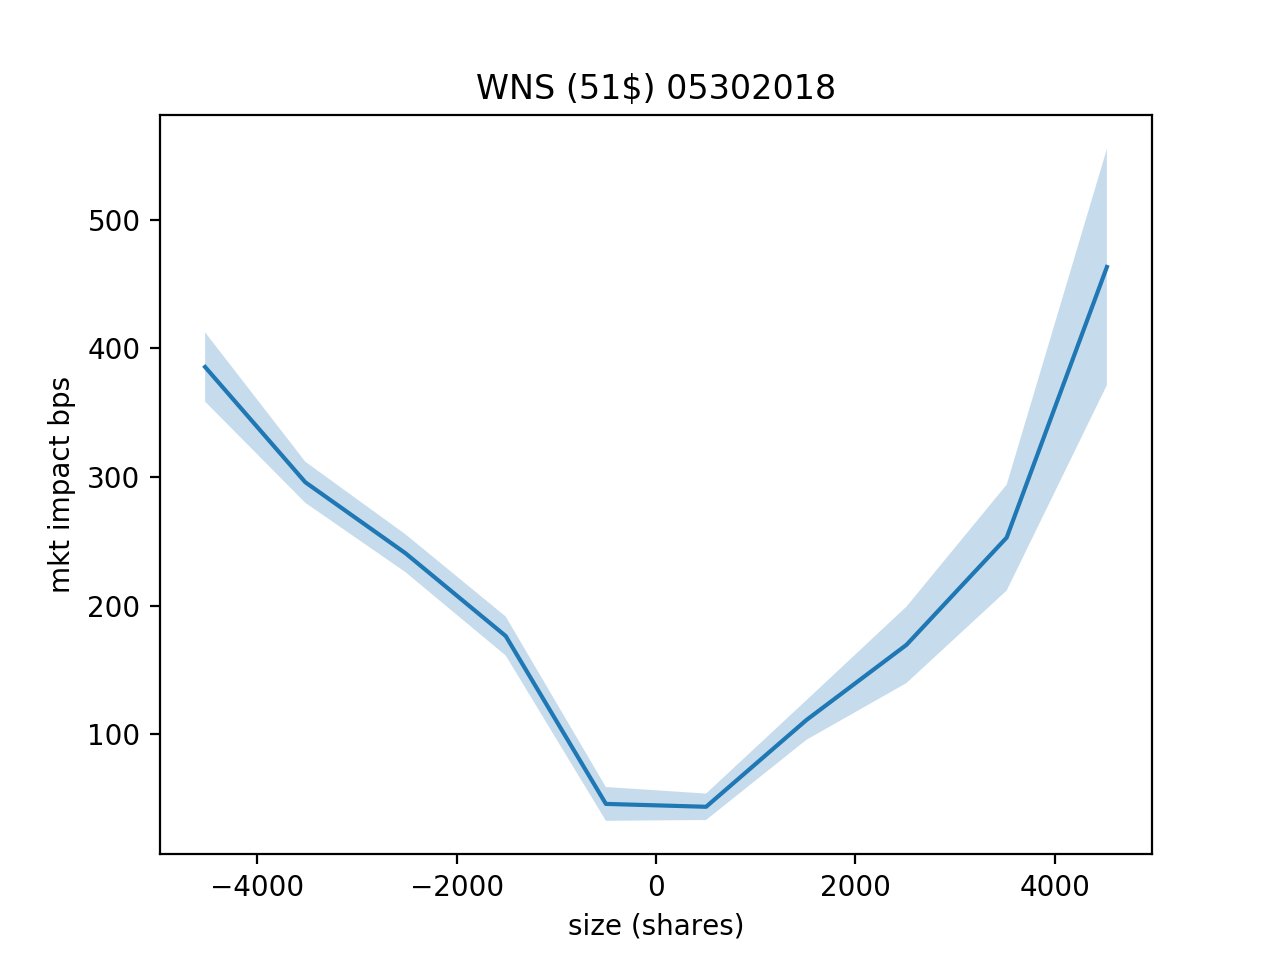

In [6]:
for s in symbols:
    for d in dates:
        _ = mkt_impact(s,d,plot=True)